# Regularization (Scaling - (Ridge-Lasso-Elastic Net) - Feature Selection - Cross validation - Grid Search ) 

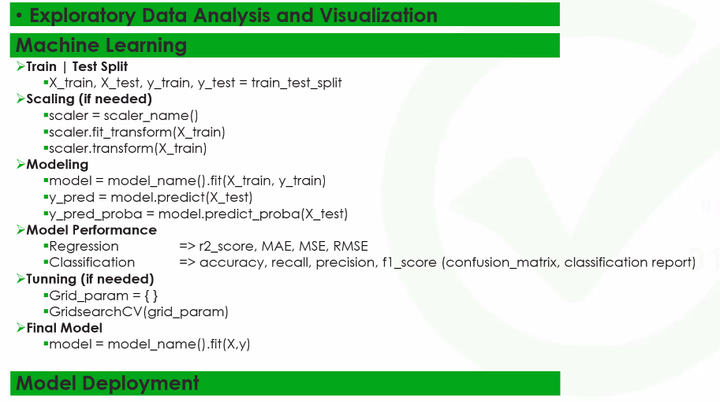

Once data split ediliyor, sonra scalling islemi yapilir. 

***Tunning** asamasinda **Hyper parametreler**le oynayarak en ideal modeli bulmaya calisacagiz.

* Regularization; asiri overfitting karsisinda de kullanilan bir tekniktir.
* Modelin karmasikligi kontrol edilir, modelin complexity si azaltilir, modelin genelleme yetenekleri artirilir. 
* Regularization; Modelin agirliklarini sinirlayarak veya azaltarak analiz sonuclarinin iyilesmesini saglar. 

En sik kullanilan regularization yontemleri; 

**L1;** Lasso; katsayilarin buyukluklerine gore bir agirliklandirma yapar, onemsiz olanlari modelden atar. 

**L2;** Ridge; Onemsiz olanlari da modlde tutar. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)

from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("Advertising.csv")
df.head(3)

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3

In [3]:
X = df.drop("sales", axis = 1) # Ilk olarak feature - target'i ayir. 
y = df["sales"]

In [4]:
# Overfitting yaptiracagiz

from sklearn.preprocessing import PolynomialFeatures

In [5]:
polynomial_converter = PolynomialFeatures(degree = 5, include_bias = False) # Overfit'li bir analiz yapip, bunu cozecegiz. 
poly_features = polynomial_converter.fit_transform(X)  # "fit transform" diyoruz buna ikisini (fit ve transform'u) bir arada yapiyoruz. 

In [6]:
poly_features.shape

(200, 55)

* **Regulaziasyonda amac;** overfitting sorununun onune gecmek, bu sorunu cozmek.

## Train | Test Split

* Fit ve scale islemlerinden once datanin bolunmesi gerekiyor. 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size= 0.3, random_state= 101) # poly_features X yerine geldi.
# X olarak yeni oluşturduğum poly_features datasını veriyoruz.

## Scalling the Data

Scalling islemi train datasinda yapilir. 
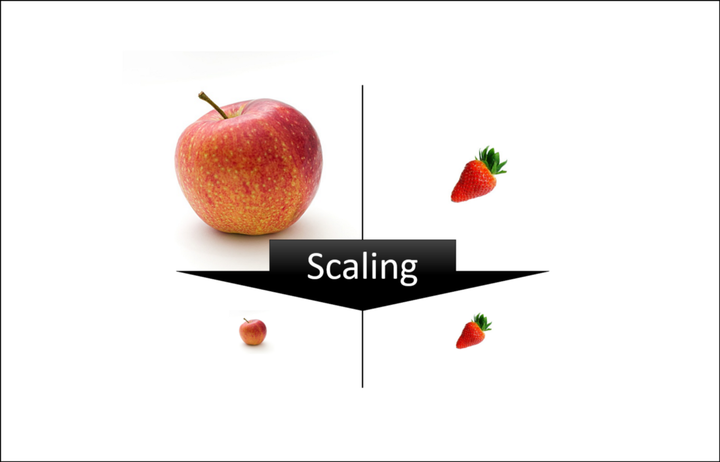

Scalling ile elmayi da cilegi de ayni boyuta getirecegiz ki modelle bunlara esit agirlik versin. Data ayni dili konusuyor olsun.

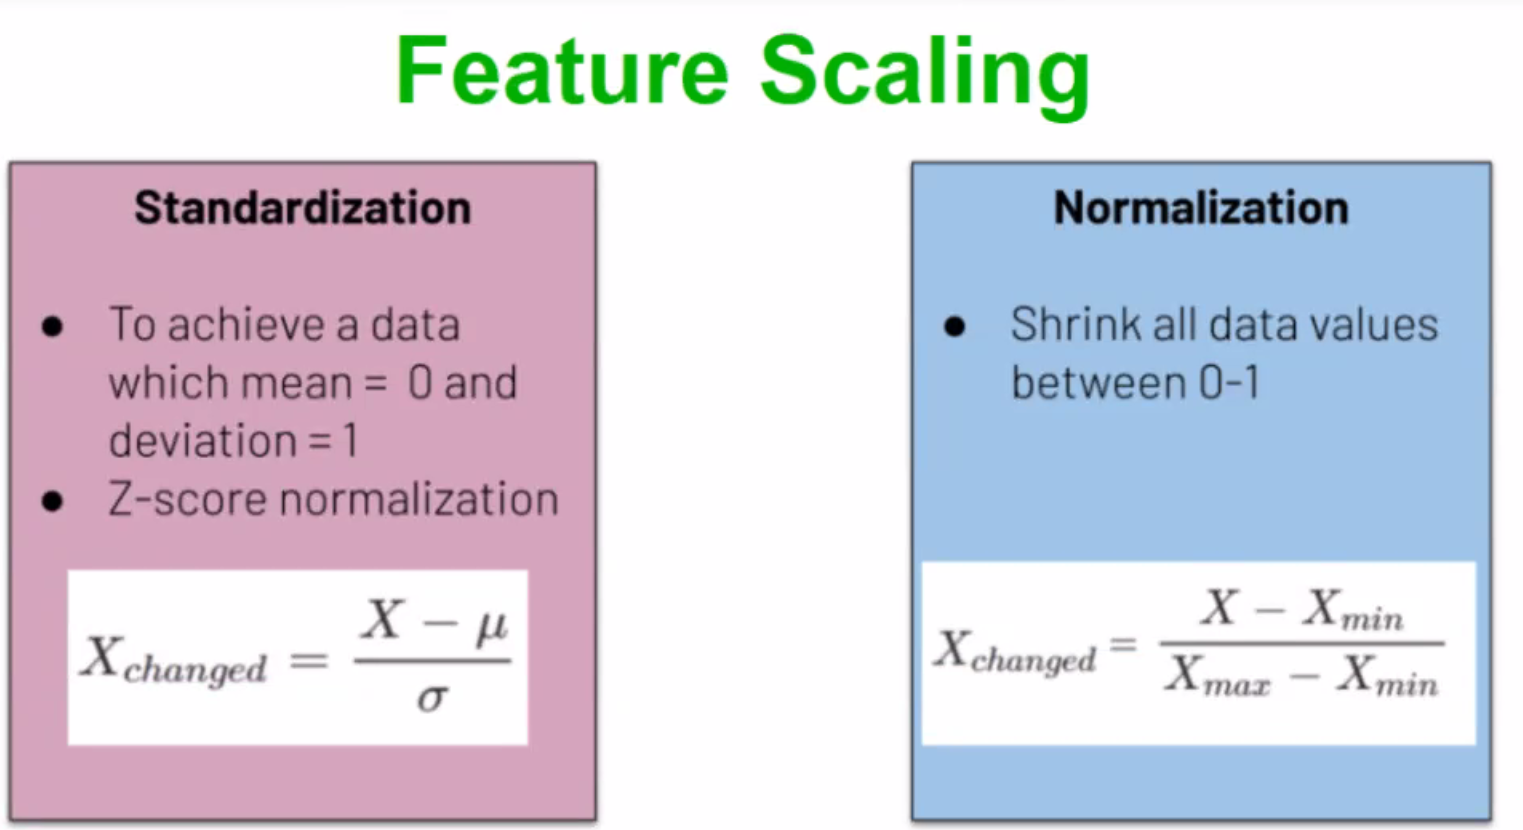

**Standardizasyonda** veriler ayni olcege getirilmis oluyor. Seri + veya - deger alabilir. **Standardizasyon:** Standardizasyon, bir veri setinin özelliklerini (features) **ortalaması 0 ve standart sapması 1 olacak şekilde ölçeklendirir**. Bu genellikle, bir özelliğin değerlerini özelliğin ortalamasını çıkararak ve standart sapmasına bölererek gerçekleştirilir. Bu işlem, verinin normal dağılıma daha yakın hale getirir. Standardizasyon, özellikler arasındaki ölçek farklılıklarını düzeltir, bu da bazı algoritmaların (örneğin, lineer ve lojistik regresyon, destek vektör makineleri ve sinir ağları gibi) performansını artırabilir. Standardizsyonda modelimizi z skoru cinsinden yazıyoruz. Bunu yaptıktan sonra bütün featurelerimin ortalaması 0 std.sap.sı 1 olacak. Z-skoru, verileri nasıl elde ediliyor alttaki formülü mevcut ama teoriksel olarak veri noktasının ortalamadan ne kadar uzakta olduğuna göre bir skor alıyor.Ortalama ve standart sapma değerlerinin matematiksel işlemiyle z-skoru pozitif veya negatif değerler alabiliyor. Yatay eksendeki her sayı bir z-puanına karşılık gelir. z -puanı bize bir gözlemin ortalamadan(μ) kaç adet standart sapma uzak olduğunu göstermektedir.

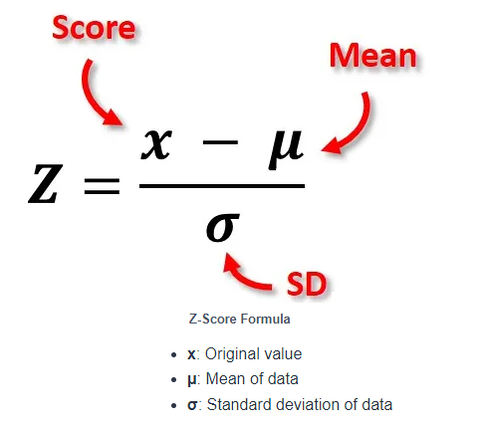


* Normalize ettigimizde veri normal dagilima daha yakin hale gelir. Veri normal dagilima yakin degilse normalizasyona ihtiyac olur. 

* Her seride normalizasyona ihtiyac olmaz. Degerler arasinda cok buyuk farklar varsa o zaman kullaniriz bunu.

**Normalizasyon:** Normalizasyon, **veri setinin özelliklerini 0 ile 1 arasında bir ölçeğe getirir**. Bu genellikle, bir özelliğin değerlerinden minimum değerini çıkararak ve ardından bu sonucu maksimum değer ile minimum değer arasındaki farka bölererek gerçekleştirilir. Normalizasyon, verinin belirli bir aralığa sığdırılmasını sağlar ve genellikle k-NN, K-Means ve sinir ağları gibi algoritmalar için yararlıdır, çünkü bu algoritmalar genellikle özelliklerin ölçeklerine duyarlıdır.



Her iki teknik de kendi uygulamalarına ve algoritmalara sahip olup, belirli bir durumda hangi tekniğin kullanılacağı genellikle kullanılan algoritmanın gereksinimlerine ve verinin dağılımına bağlıdır. Örneğin, **verinin normal dağılıma sahip olmadığı durumlarda, normalizasyon genellikle daha iyi bir seçenek olabilir. Öte yandan, verinin normal dağılıma yakın olduğu durumlarda, standardizasyon genellikle tercih edilir.**

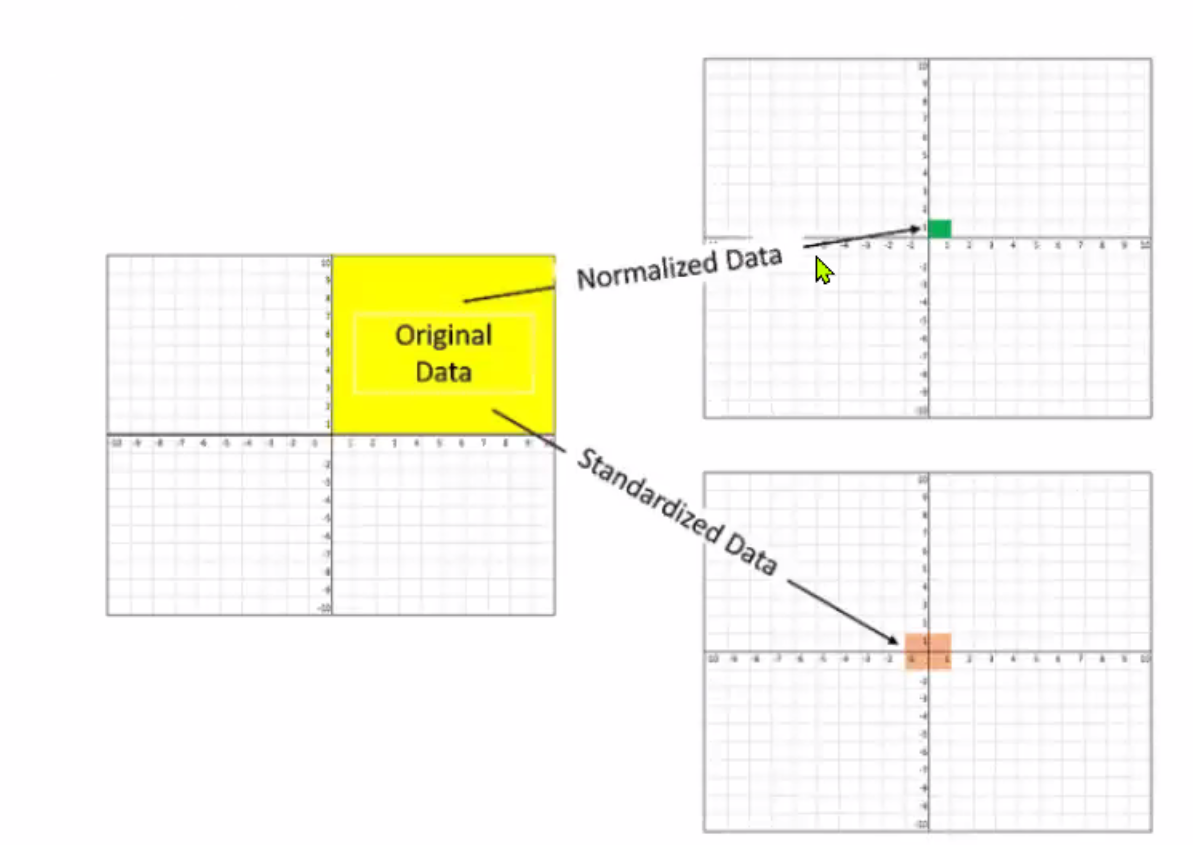

## Robust Scaler

**Robust scaler :** RobustScaler, adından da anlaşılabileceği gibi, veri setindeki aykırı değerlere (outliers) karşı "sağlam" bir ölçeklendirme tekniğidir. Normalleştirme veya standartlaştırma teknikleri, aykırı değerlerin varlığından ciddi şekilde etkilenebilirken, RobustScaler bu tür değerlere karşı daha dirençlidir.

RobustScaler, verinin medyanını çıkartır ve ardından veriyi birinci çeyreklik (Q1, yani 25. yüzde dilim) ve üçüncü çeyreklik (Q3, yani 75. yüzde dilim) arasındaki aralığa (interquartile range - IQR) böler. Yani:

X, ölçeklendirme yapılacak olan özelliktir. Median(X), özelliğin medyan değeridir. IQR(X), özelliğin birinci çeyreklik ile üçüncü çeyreklik arasındaki farkıdır (yani Q3 - Q1). X_scaled, ölçeklendirme sonrası özelliktir. Bu teknik, özellikle aykırı değerlerin çok olduğu durumlarda yararlıdır. Çünkü medyan ve çeyreklikler, ortalama ve varyans kadar aykırı değerlerden etkilenmez. Sonuç olarak, RobustScaler verinin orijinal dağılımını korurken, aynı zamanda aykırı değerlerin etkisini azaltır.

Robust Scaler, Normalizasyon ile benzer şekilde çalışır. **Aykırı değerlere sahip verilerde daha iyi sonuçlar verebilir.** Yine veri dağılımı ile benzerlik gösterir ancak aykırı değerler dışarıda kalır. Medyan değeri sonradan kullanılmak üzere elenir ve değerler 1.ve 3. quartil aralığına oturtulur.

Bu yontem **skorlari cok fazla iyilestirmez. Aykiri degerleri kendimiz halletmeliyiz EDA asamasinda**.  

**Saglik datalariyla calsirken Robust Scaler yapilmasinda yarar var.**

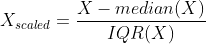

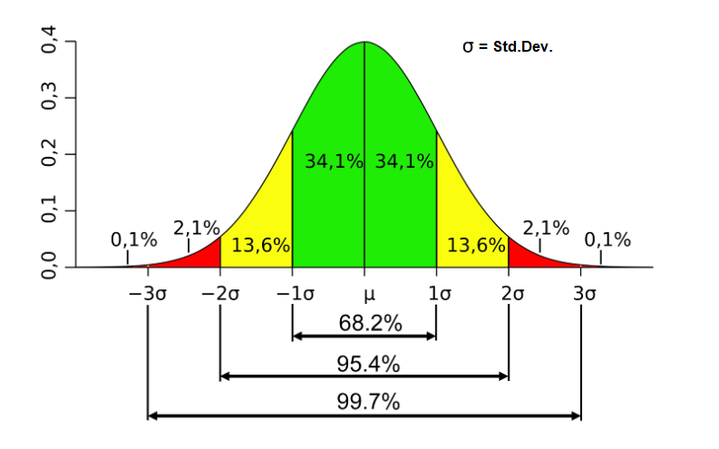

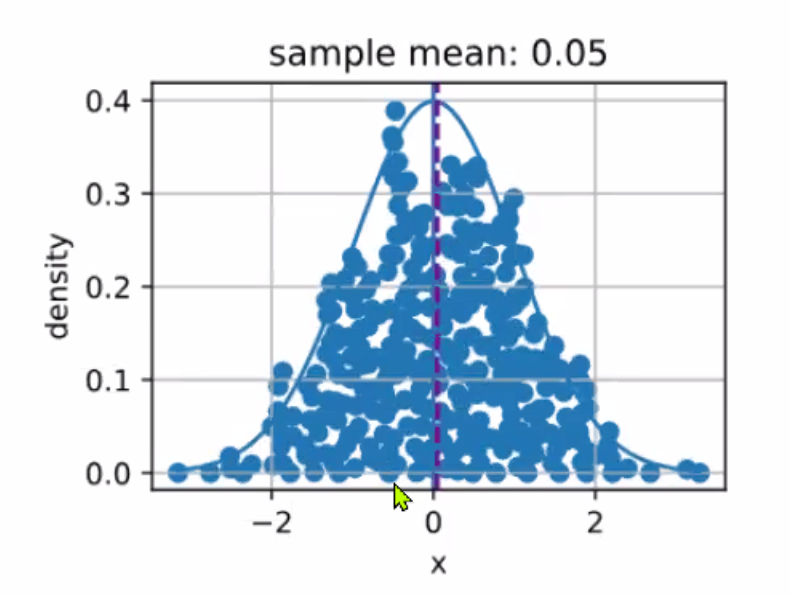

Ortalamaya yakin gozlemlerin Z scoru mutlak degerce kucuk olurken, uclarda yer alan min ve max degerler mutlak degerce daha buyuk Z score sahip olur.

## Scaling

In [9]:
# Standardizasyonu kullanabilmek icin; (Butun data ayni seyi ifade ediyorsa standardizasyona gerek yok.)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Normalizasyonu MinMaxScaler ie yapiliyoruz
scaler = StandardScaler()                                                  # Robust Scaler islemi RobustScaler ie yapilir     


# DL de normalizasyon yapilmasi daha yararli. 
#SVM de standardizasyon. 

# Veri normal dagilima sahip degilse normalizasyon, normal dagilima sahipse standardizasyon tercih edilebilir.  


In [10]:
scaler.fit(X_train)  # scale islemi her zaman train datasina uygulanir. # burada scaler.fit_transform(X_train) desek asagidakiyle birlikte ikisini bier arada yapabilirdi.

StandardScaler()

In [11]:
# Once split yapip sonra sdandardizasyon yaptigimiz icin data leakage olmaz.

In [12]:
X_train_scaled = scaler.transform(X_train) # X_trainde fit ve transfer yaptigimiz icin ort 0, std 1 dir.
X_train_scaled

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [13]:
X_test_scaled = scaler.transform(X_test) # X_test'e asla fit uygulanmaz, sadece transform uygulanir.
X_test_scaled # X_testte sadece transfer yaptigimiz icin std 1'den buyuk de olabilir. Bu durum, trainden teste data leakage olmadigina bir kanittir. 

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

In [14]:
# Standardizasyonda ortalama 0, std 1 olmaliydi.  
# Bakalim train serisinde bu gerceklesmis mi Burada  traini esas almamizin nedeni; standardizasyon islemini 
# train uzerinden fir=t ediyor (sisteme ogretiyor olmamizdir).

In [15]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round() #saglama yapmak icin koyduk bu satiri. Ortalama 0, std 1 i ye bakiyoruz.

0    1    2    3    4    5    6    7    8    9   ...   45   46   47  \
mean -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0  ... -0.0 -0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

       48   49   50   51   52   53   54  
mean  0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0  
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 55 columns]

In [16]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

0    1    2    3    4    5    6    7    8    9   ...   45   46   47  \
mean -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ... -0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

       48   49   50   51   52   53   54  
mean -0.0  0.0  0.0  0.0  0.0  0.0  0.0  
std   1.0  1.0  1.0  1.0  1.0  2.0  2.0  

[2 rows x 55 columns]

* Traindeki degerlere gore standardizasyon yaptik, bunu test kismina transfer ettik. Burada buyuk degerler varmis ki std 2 cikti son kisimlarda. Test datasini modele gostermedik, boylece data leakageyi onledik.

* Burada 2 lerin olmasi; modelin fitting islemini (scale etme, standardizasyon islemini) train datasi uzerinden yapmis olup, test datasini gormemis olmasindan kaynaklanmaktadir. Bu, iyi bir durum olup, data leakage sorunu olmadigina bir isarettir.

* Scale islemi sonrasinda scorlarda biraz iyilesme beklenir. 

## Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression() #lm linear regresyon değişkeni. lm; linear model

In [19]:
lm.fit(X_train_scaled, y_train) #x trainin scaled datasını (yani scale edilmiş datayı) verdim.
# fit gordukmu train datasini kullaniri, transfer gordugumuzde hem train, hem de test verilerini kullaniriz.

LinearRegression()

In [20]:
# pred degerlerini elde edelim. Modelin train ve testteki skorlaria bakabilmek icin bunlari yapioruz.
y_pred = lm.predict(X_test_scaled)        # y_pred alırken scaled edilmiş test datasını alıyoruz
y_train_pred = lm.predict(X_train_scaled) # y_train_pred hesaplarken scaled edilmiş train datasını alıyoruz

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):  # train_val: train validation
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [22]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") #modelin adı. linear simple: ls
ls      


linear_train  linear_test
R2        0.997607     0.764990
mae       0.186213     0.665959
mse       0.062968     6.634847
rmse      0.250934     2.575820

* R2 scorunda train ve test arasında varyans farkı çok fazla. Train ve test kismina ait diger sonuclar da uyumlu degil. Train datasinda cok iyi sonuc verirken test datasinda ayni performansi gosteremiyor. O zaman **Overfiting** durumu sözkonusu.

* R2 ler arasindaki fark ne kadar olsaydi normal olurdu? Olcusu nedir?
   * Fark coksa once Cross-Validation yapariz. 
   * Overfit demek icin net bir fark siniri yok. Biz varmis gibi CV yapalim, tedbirleri alalim. Overfit, CDBS model            icinde otomatik cozuluyor. Lasso/Ridge, regularizasyon parametreleri bunlari otomatik cozer. XGboost cok populer.        Hem regresyonda hem classifiationda ise yariyor. 
   * Trainde R2 nin 1'e cok yakin olmasi veya testte R2 nin 0.90'i asmasi Overfitting suphesi dogurur.

* Target 0, 1 gibi sayilardan olusuyorsa R2 1 cikabilir. Ama continous targette R2 1 cikarsa kesinlike OVERFITTING vardir.   

* Ilk alina sonuclarda hata olabilir diye REGULARIZATION yapacagiz. Bu m=nedenle buralarda cok takilma...

## Multicollinearity  (CDBS)

0.9 uzeri korelasyon olan feature arasinda CDBS vardir der, birini atariz analizden. 

Bu verilerden hangisinde daha az Null deger varsa onu kullan. Eger birinin Null oldugu yerde digeri dolu ise, o bilgiyi kullan, sonra drop et.

https://www.geeksforgeeks.org/set-pandas-dataframe-background-color-and-font-color-in-python/

Feature selection yapabilmemiz icin CDBS ile mucadele etmemiz gerekiyor.

https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

In [23]:
def color_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: green'` for positive
    strings, black otherwise.
    """
    if val > 0.90 and val <0.99:  # %90 uzeri korelasyon olanlari sec, kirmizi yaz diyoruz.
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color : {color}'

In [24]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

* Burada kirmizi ile gorulen yerlerdeki veriler arasinda CDBS vardir. 

## Cross Validation

Train datasini kendi icinde tekrar test ve train olarak, alt gruplara ayiracagiz. Ve bu yeni data seti uzerinden model tahmini yapip R2 degerleri elde edecegiz. Sonra bu R2 degerlerinin aritmetik ortalamasini alacagiz. Boylece her alt grup icin ayni R2 degerinin gecerli olup olmadigini gorebiliriz. CV sonrasi aldigimiz R2 degeri bizim icin gecerli olacak. 

**CV olmazsa olmaz. Butun datalarda ve modellerde CV uygulyacagiz**. 

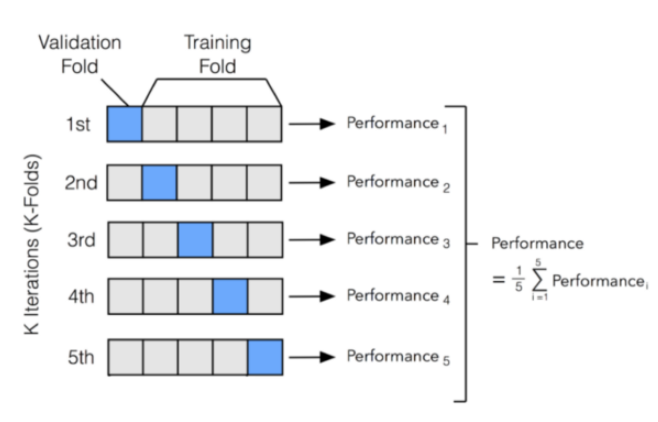

Cross-validation (Çapraz Doğrulama), modelin genelleme yeteneğini ölçmek için kullanılan bir tekniktir. Bu teknik, modelin aşırı uyum (overfitting) yapmasını önlemeye yardımcı olur ve modelin gerçek dünya verilerine karşı performansının daha doğru bir tahminini sağlar.
En yaygın kullanılan cross-validation türü k-katlı çapraz doğrulama (k-fold cross validation) olarak bilinir. İşte adımları:
Veri seti rastgele "k" eşit büyüklükteki alt kümelere (katmanlara, foldlara) ayrılır. Genellikle k = 5 veya 10 seçilir, ama bu durum probleme ve veri setinin büyüklüğüne göre değişebilir.
Model, k-1 katmanda eğitilir ve kalan katmanda test edilir. Bu işlem her katman için tekrarlanır, yani her katman tam olarak bir kez test seti olarak kullanılır. Bu yüzden bu yönteme "k-katlı" denir.

Her iterasyonda, modelin performansı (örneğin, doğruluk, hatırlama, F1 puanı vb.) ölçülür. Bu ölçümler, modelin genel performansını tahmin etmek için kullanılır.

Sonunda, k iterasyonun tümünden elde edilen performans metrikleri ortalaması alınır. Bu, modelin genelleme performansının bir tahminidir.

Cross-validation, modelin hangi hiperparametrelerin en iyi sonucu verdiğini belirlemek için de kullanılır. Bu, grid search (ızgara arama) veya random search (rastgele arama) gibi tekniklerle birleştirilerek yapılır.

Yüksek varyanslı (genellikle karmaşık) modellerde cross-validation, modelin aşırı uyum yapmasını önlemeye yardımcı olur. Bu, modelin hem eğitim setinde hem de test setinde benzer performans göstermesini sağlar.

Ancak unutulmamalıdır ki, cross-validation da kendi limitlerine sahiptir. Örneğin, veri seti çok küçükse veya belirli sınıflardan örnekler çok azsa, cross-validation sonuçları yanıltıcı olabilir. Bu tür durumlar için, stratified k-fold cross validation (katmanlı k-katlı çapraz doğrulama) gibi teknikler kullanılabilir. Bu teknik, her katmanda sınıf dağılımının orijinal veri setine benzer olmasını sağlar.

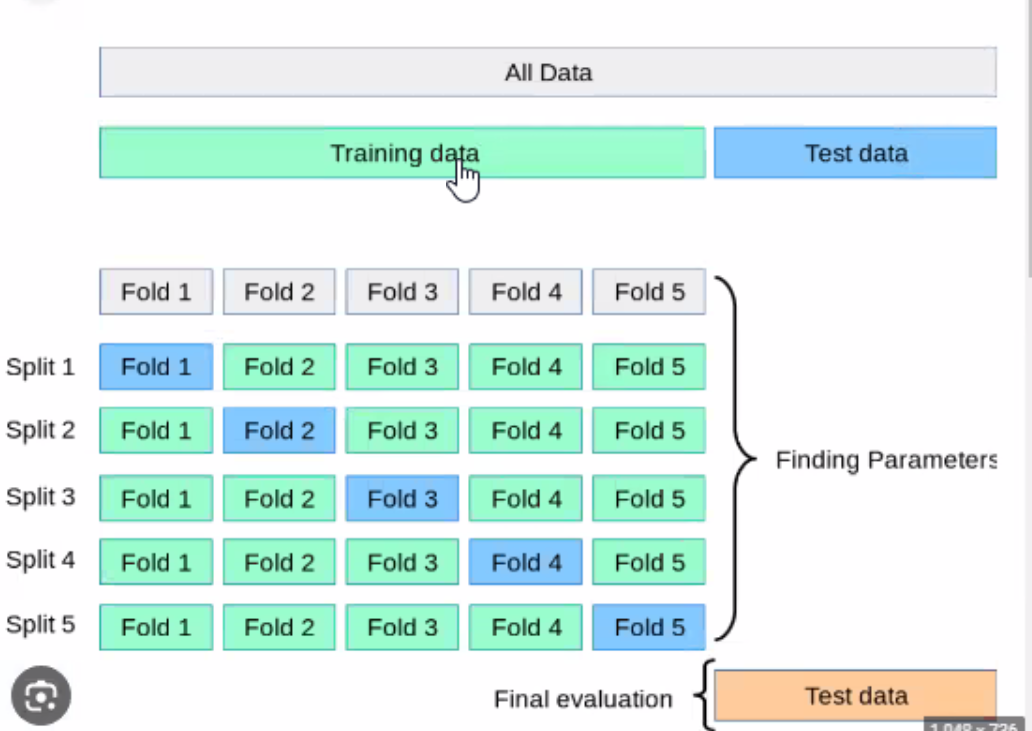

* CV nin defaultu 5'tir. Bunu ne kdar artirirsak sonucta alinan skorlar daha dogru olur. 
* CV her modelde mutlaka yapilacak....


Eger CV sonrasi aldigim skor train datasi ile uyumlu OVERFIT yoktur.

In [25]:
from sklearn.metrics import SCORERS # 

In [26]:
list(SCORERS.keys())  # CV sonrasi hangi skorlari gormek istiyorsan onlarin isimlerini buradan al.  
# neg yazmasi onemli degil. Sonucu her zaman isaretsiz rapor et ve yorumla. 

['explained_variance',
 'r2',
 'max_error',
 'matthews_corrcoef',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'positive_likelihood_ratio',
 'neg_negative_likelihood_ratio',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',

Bu listedeki fonksiyonlardan  bazilarinin negatif olmasi onemli degil. R2 1'e egimli iken biz 0'a yakinsamasini istedimiz icin negatif deger var ama yorumlamasi isaretsiz olarak yapilir.

In [27]:
# CV yapiyruz;

from sklearn.model_selection import cross_validate, cross_val_score

In [28]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10) # cv; cross validation demek

* Cross - Validation; ne kadar yuksek olursa model o kadar hassas calisir. 
Ama bunun bir maliyeti (zaman kaybi, is yuku) var.

Finansda ---> CV = 5, 6 olmali. Min 5 olmali. 

Insanla ilgili datalarda ---> CV olabildigince yuksek tutulmalidir. Insan hayati soz konusu cunku. Buluttan bir bilgisayar kaldiriyorusak (bulut uzerinde calisiyorsak) CV nin artmasi sorun olmaz.

**Data cok az degilse CV = 10 yap.** 

In [29]:
pd.DataFrame(scores, index = range(1,11))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1   0.002949    0.001024 -0.280734                     -1.994430   
2   0.002973    0.000000  0.993019                     -0.377066   
3   0.002000    0.001084  0.983934                     -0.392312   
4   0.002960    0.001025  0.825272                     -0.979767   
5   0.002975    0.001000  0.991181                     -0.322253   
6   0.002092    0.001997  0.969012                     -0.484493   
7   0.002171    0.002003  0.992885                     -0.327955   
8   0.001998    0.001001  0.990130                     -0.447015   
9   0.002018    0.001110  0.965508                     -0.465024   
10  0.003022    0.000999  0.990123                     -0.324433   

    test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                    -31.328119                         -5.597153  
2                     -0.250648                         -0.500647  
3                     -0.306241                         -0.553391  
4                     -4.402358                         -2.098180  
5                     -0.166869                         -0.408496  
6                     -0.976815                         -0.988339  
7                     -0.144808                         -0.380536  
8                     -0.332058                         -0.576244  
9                     -0.528863                         -0.727230  
10                    -0.197801                         -0.444748

* ilk satirda R2 nin neg cikmasi, buradaki datanin kotu bir dilimden gelsigini gosterir. 

In [30]:
# Ortalamayi hesaplayabilmek icin;

scores = pd.DataFrame(scores, index=range(1,11)) #0 dan başlatmasın diye 1 verdim indexe
scores.iloc[:, 2:].mean()


test_r2                             0.842033
test_neg_mean_absolute_error       -0.611475
test_neg_mean_squared_error        -3.863458
test_neg_root_mean_squared_error   -1.227496
dtype: float64

* trainin butununde R2 0.99 iken alt kisimlara inerek detayli inceledigimizde R2 0.84'e dustu.
* Ama hala test ksimi ile aralarinda 0.08 fark var, OVERFITTING olabilecegini dusundurur.


* CV sonucu TRAIN kismiyla karsilastirilir. Ama bu sonuc ile TEST kismina ait sonuc arasinda cok fark varsa OVERFIT ihtimalini dusun...



* **MAE  ile RMSE arasindaki farkin cok olmasi outlier isareti olarak degerlendirilir**

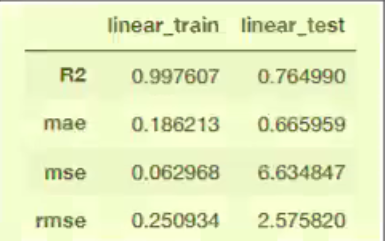

## 10 defaCV yapinca; 

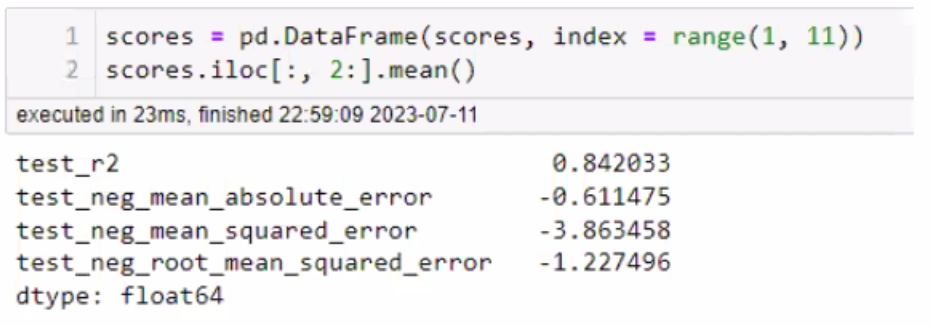

Yine Overfitting var cunku R2 dusuk testten 


## CV=10 yapalim

In [31]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10) 

In [32]:
pd.DataFrame(scores, index = range(1,11))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1   0.003177    0.000992 -0.280734                     -1.994430   
2   0.001975    0.001001  0.993019                     -0.377066   
3   0.003001    0.001288  0.983934                     -0.392312   
4   0.003006    0.001001  0.825272                     -0.979767   
5   0.003000    0.001587  0.991181                     -0.322253   
6   0.004956    0.001098  0.969012                     -0.484493   
7   0.001897    0.000995  0.992885                     -0.327955   
8   0.002515    0.001026  0.990130                     -0.447015   
9   0.001974    0.001002  0.965508                     -0.465024   
10  0.003000    0.000000  0.990123                     -0.324433   

    test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                    -31.328119                         -5.597153  
2                     -0.250648                         -0.500647  
3                     -0.306241                         -0.553391  
4                     -4.402358                         -2.098180  
5                     -0.166869                         -0.408496  
6                     -0.976815                         -0.988339  
7                     -0.144808                         -0.380536  
8                     -0.332058                         -0.576244  
9                     -0.528863                         -0.727230  
10                    -0.197801                         -0.444748

In [33]:
scores = pd.DataFrame(scores, index=range(1,11)) #0 dan başlatmasın diye 1 verdim indexe
scores.iloc[:, 2:].mean()

test_r2                             0.842033
test_neg_mean_absolute_error       -0.611475
test_neg_mean_squared_error        -3.863458
test_neg_root_mean_squared_error   -1.227496
dtype: float64

** CV'yi artirinca R2 artti, 0.84 oldu. 

## CV yi 20 yapalim

In [34]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 20) 

In [35]:
pd.DataFrame(scores, index = range(1,21))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1   0.004069    0.000999  0.993766                     -0.319148   
2   0.002000    0.002002 -1.453991                     -2.257873   
3   0.002516    0.001000  0.989315                     -0.581749   
4   0.002000    0.001001  0.997742                     -0.207610   
5   0.001997    0.001003  0.978492                     -0.436699   
6   0.002439    0.001002  0.987919                     -0.360711   
7   0.002996    0.001037  0.997640                     -0.244081   
8   0.001996    0.001681  0.987543                     -0.403845   
9   0.001882    0.001000  0.989136                     -0.266710   
10  0.003000    0.000000  0.993841                     -0.299154   
11  0.002000    0.002002  0.960753                     -0.634857   
12  0.003170    0.000996  0.994129                     -0.239424   
13  0.002998    0.001002  0.996713                     -0.301340   
14  0.002515    0.001001  0.953104                     -0.323350   
15  0.002981    0.000000  0.994411                     -0.341831   
16  0.001973    0.001029  0.984547                     -0.591421   
17  0.001568    0.002000  0.985291                     -0.321518   
18  0.002000    0.001002  0.962312                     -0.619646   
19  0.000998    0.001695  0.989682                     -0.345260   
20  0.001868    0.000999  0.922467                     -0.513178   

    test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                     -0.204240                         -0.451930  
2                    -23.374016                         -4.834668  
3                     -0.443830                         -0.666206  
4                     -0.066795                         -0.258448  
5                     -0.306638                         -0.553749  
6                     -0.254773                         -0.504751  
7                     -0.074768                         -0.273438  
8                     -0.229807                         -0.479382  
9                     -0.133161                         -0.364913  
10                    -0.130647                         -0.361451  
11                    -1.629274                         -1.276430  
12                    -0.102686                         -0.320446  
13                    -0.115600                         -0.340000  
14                    -0.166950                         -0.408595  
15                    -0.161281                         -0.401598  
16                    -0.585448                         -0.765146  
17                    -0.159061                         -0.398824  
18                    -0.745800                         -0.863597  
19                    -0.290105                         -0.538614  
20                    -0.763810                         -0.873962

In [36]:
scores = pd.DataFrame(scores, index=range(1,21)) #0 dan başlatmasın diye 1 verdim indexe
scores.iloc[:, 2:].mean()

test_r2                             0.860241
test_neg_mean_absolute_error       -0.480470
test_neg_mean_squared_error        -1.496934
test_neg_root_mean_squared_error   -0.746807
dtype: float64

* CV=20 yapinca R2 0.86 oldu. R2 train = 0.76 idi.

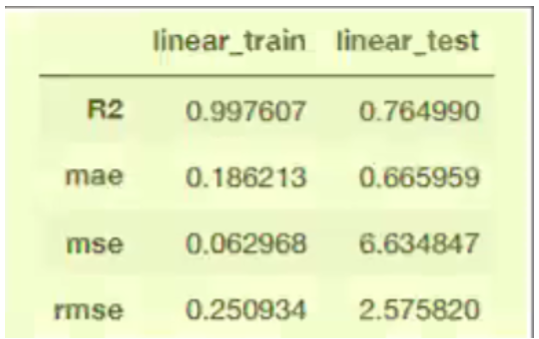

Bu durumda hala test kismina ait R2 train kismina ait R2'den dusuk olup, OVERFITTING vardir. 





**GENEL CV TORUMU METODU:**  CV yi train ve testten sonra yap, ele ettigin sonucu train kismiyla karsilastir. CV sonuclari TRAIN sonuclari ile karsilastirilir. Train ile CV uyumlu ise model genelleme yapabiliyor, OVRFIT yok. 

Eger TRAINE ait sonu CVsonucu ile yumlu degilse yine OVERFIT vardir. 

Testteki sonuc hala kotuyse (Teste ait sonuc TRAIN ve CV ye ait sonuclardan kotuyse); 1) Overfit olabilir,  2) Test icin ayrilan datada sorun vardir. Cozum onerisi; aykiri degerlerle ugras, ya da overfite ragmen devam et. L1, L2 bunu duzeltecek zaten. 

**HOCANIN NOTU:** Burada çıkan skor test-train skorları ile karşılaştırılacak.CV sonrası alınan skorun Train skor ile uyumlu olması mnodelin genelleme yeteneğinin olduğunu gösterir dolayısyla overfit yok demek olabilir. Ancak bu durumda test datasının datanın kötü bir bölümünden gelmiş olması (100.000 satırlık veriden 1000 satırlık bir test datası ayrıldığında) düşünülebilir bu durum söz konusu değilse yinede test datasının skoru göz önünde bulundurularak overfit durumu var denilir.




## Coefficients (Katsayilar)

In [37]:
lm.coef_

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [38]:
# Bunu alt alta gorebilmek icin;
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef_"])
lm_df

lm_coef_
0    13.942084
1    -3.147845
2     0.622117
3   -58.348614
4    17.227695
5    -3.875031
6    14.688014
7     0.835494
8    -2.765824
9   115.503087
10  -28.684170
11   20.257596
12   -7.338979
13  -19.840491
14    9.183389
15  -25.162985
16  -16.859628
17   22.723785
18   -3.581168
19 -103.955734
20   28.837309
21  -35.712475
22   -3.671007
23   39.849162
24  -15.897735
25    3.956800
26    5.331437
27    7.516232
28  -14.305237
29   22.095444
30   23.111981
31  -12.074690
32  -29.920346
33   22.775684
34   34.742828
35  -12.527750
36   18.231022
37   11.082281
38  -24.335582
39   13.039461
40  -11.738058
41    7.369086
42  -15.865076
43    8.171488
44    8.933054
45  -10.070050
46    1.904587
47    7.065967
48   -0.257477
49  -10.689878
50   -5.390108
51   -1.578588
52   11.400894
53    6.352215
54  -13.457603

* Burada en buyuk katsayi 115.5 iken en dusuk katsayi -103.9'dur. Bunlarin en  onemli degiskenler (katsayilar) olup olmadigina LASSO ile karar verecegiz. 

# REGULARISATION

* OVERFITTING i onleme icin gelistirilmis bir yontemdir. Overfitting durumunda model genelleme yapamaz. Regulaizasyon ile modelin genelleme ozelligini artirmaya calisiriz. En yaygin regularizasyon yopntemleri L2  (Ridge; bunda Bi lerin kareleri aliniyor) ve  L1 (Lasso). 

* L1 ve L2 modeldeki **CDBS, overfitting ve underfitting** sorunlarindan kurtariyor.

* Train setindeki skorlar biraz bozulup, test kismina ait skorlar iyilestirilmeye calisilir, Bias biraz artirilip (biraz bias eklenip), variance azaltiliyor. 

##  RIDGE  REGRESSION

Feature selection icin yararlidir. 

Her zaman bak buna.

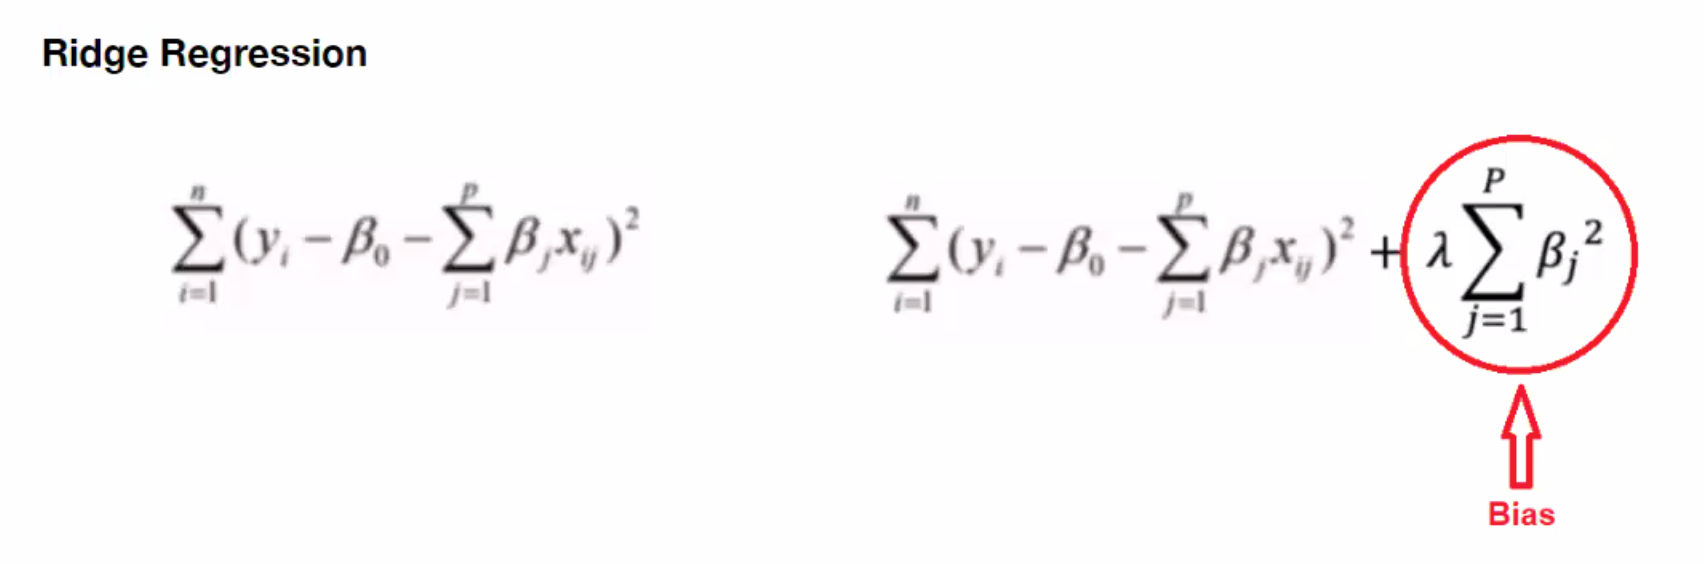

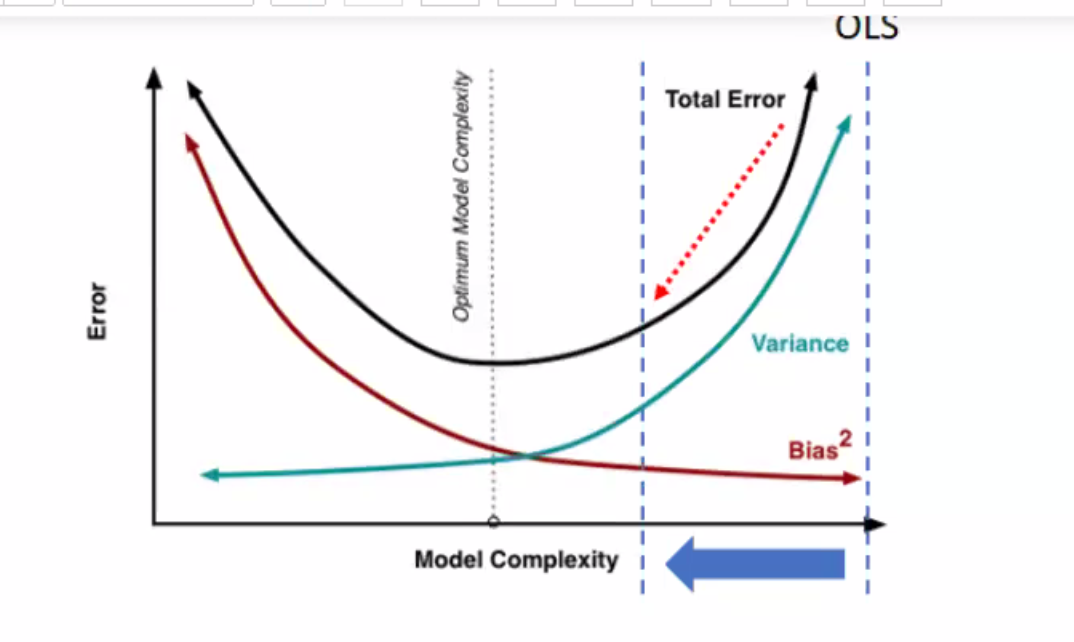

* Ridge'de model **complexity** si **katsayilarin agirliginin degistirilmesiyle dusuyor**. 

* RIDGE sonucunda; Trainin skorunda az bir dusu olu ama test skoru iyilesmeye baslar. 

In [39]:
# Ridge kutuphanesini cagiralim;

from sklearn.linear_model import Ridge, RidgeCV

In [40]:
ridge_model = Ridge(alpha=1, random_state=42) # alpha default = 1. Alfa arttikca modelimi daha fazla duzenle, katsayiari daha fazla kisitla demek olur. 
# Yukse alpha ile Ridge OVERFITT i azaltir ama UNDERFIT'e dusebiliriz. 
# Alpha dusukse kisitlama azalir, katsayilari daha az atar. OVERFIT'i duzeltemeyebilir. 
# Ridge degiskenlerin onem derecesini azaltiyor. Model complexitysi azalmiyor. Varyans azaliyor.

In [41]:
# Ridge regresyon modelini fit edelim; (Modeli egittim)

ridge_model.fit(X_train_scaled, y_train) #scale edilen X_train ve y_train ile fit ederiz

Ridge(alpha=1, random_state=42)

In [42]:
# Elde ettigimiz modeli kullanarak test ve train datalari icin y degerlerini predict edelim. 

y_pred = ridge_model.predict(X_test_scaled)

y_train_pred = ridge_model.predict(X_train_scaled)

In [43]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge") # train_val fonksiyonua tahmin ve testleri veriyoruz. "train_val" yukarida tanimladigimiz bir fonksiyon idi. 
rs   # rs: ridge simple regresyon tahmini sonucu 

ridge_train  ridge_test
R2       0.988677    0.982511
mae      0.338149    0.482446
mse      0.297970    0.493743
rmse     0.545866    0.702669

* Ilk sonuca **ILKEL SKOR** da denir. Buna bak, hemen CV ye gec. 

**Ridge regresyon** analizi sonucunda **Train deki skorlar** ile **testteki skorlar uyumlu** (birbirine yakin ise ki burada yakin, kesinikle OVERFIT yoktur) degilse OVERFITTING vardir. Bu modelin asagida gorulan ilk halinde de Overfitting var. Cunlu R2'ler ve diger skorlar arasinda cok fark var. 

RIDGE ve LASSO sonucunda TRAIN ve TEST arasinda uyumsuzluk cikarsa o **DATADA** kesinlikle **SORUN** vardir.

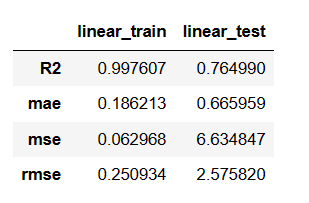


* ilk halinde trainde R2 0.99 iken Ridge de 0.98 e dusuruldu, buna karsilik testteki R2 0.76 dan 0.98 e cikti. Boylece bir miktar bias ile bir niktar varyans arasinda trade-off yapildi. Overfitting sorunu ortadan kaldirildi. 

* Ridge yapildiginda overfit cozulur, zaten bunu cozsun diye gelistirilmis bir yontem. 

**DIKKAT:** Ridge ve Lasso sonrasi OVERFITTEN hic suphelenme, kesinlikle yoktur. 

* Continious datada R2 = 1 cikarsa yine OVERFIT vardir deriz. 


**Lilibet H:** Daha once train dataseti icin R2 0.99 idi, ama test icin R2 0.76 idi. Ben o yuzden overfitting yorumu yapmistim. Overfitting ile nasil mucadele ediyoruz--> biri Ridge.
Risge yapinca bakiyorum, test R2 ile train R2 arasindaki fark kapanmis.
Ridge’den sonra overfitting sorunumuz duzeldi.
Ridge ile variance azaltiyoruz.
Ilkinde R2 0.99 diye degil, train icin 0.99, test icin 0.76 diye overfitting yorumu yaptim.
Ridge ve Lasso yapinca zaten overfitting sorunu kalmamistir.

In [44]:
# Butun featurelerden bir bilgi alarak calisir Ridge, Datayi alir pataklar ama oldurmez. Lasso oldurur. 

In [45]:
pd.concat([ls, rs], axis = 1)

linear_train  linear_test  ridge_train  ridge_test
R2        0.997607     0.764990     0.988677    0.982511
mae       0.186213     0.665959     0.338149    0.482446
mse       0.062968     6.634847     0.297970    0.493743
rmse      0.250934     2.575820     0.545866    0.702669

* linearin train kismindaki R2 ridge regrsyonda biraz kuculdu ama test kismina ait R2 buyudu. OVERFITTING ortadan kalkti. 

In [46]:
# Burada Ridge'ye CV uyguluyoruz. Bunu her asamada yapabiliyoruz. Sadece CV=5 / 10 yaz yeter.

model = Ridge(alpha = 1, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train,
                      scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [47]:
pd.DataFrame(scores, index = range(1,6))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1  0.002014    0.001004  0.988913                     -0.405789   
2  0.001994    0.000000  0.969951                     -0.551469   
3  0.000997    0.000000  0.950978                     -0.552320   
4  0.000000    0.001508  0.991259                     -0.365106   
5  0.001059    0.000952  0.986854                     -0.343011   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                    -0.336840                         -0.580379  
2                    -0.677493                         -0.823099  
3                    -1.360795                         -1.166531  
4                    -0.237919                         -0.487769  
5                    -0.243072                         -0.493023

In [48]:
scores = pd.DataFrame(scores, index = range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.977591
test_neg_mean_absolute_error       -0.443539
test_neg_mean_squared_error        -0.571224
test_neg_root_mean_squared_error   -0.710160
dtype: float64

* CV sonrasi skorlar (R2 = 0.97) ile Ridge modelde aldigimiz skorlar (R2 = 0.98) uyumlu. Demek ki Overfitting tamamen cozulmus. 

## CV = 10 yapalim;

In [49]:
model = Ridge(alpha = 1, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train,
                      scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [50]:
scores = pd.DataFrame(scores, index = range(1,11))
scores.iloc[:, 2:].mean()

test_r2                             0.978573
test_neg_mean_absolute_error       -0.441032
test_neg_mean_squared_error        -0.561648
test_neg_root_mean_squared_error   -0.666021
dtype: float64

In [51]:
# 5 defa CV de hata cikiyor, 10 defa CV kullanmak daha iyi!!! Data cok buyukse CV min 5 olmali. Degilse CV 10 olmali.   

In [52]:
#Test ve traina ait sonuclari karsilastirmak istiyoruz.

train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

ridge_train  ridge_test
R2       0.988677    0.982511
mae      0.338149    0.482446
mse      0.297970    0.493743
rmse     0.545866    0.702669

* Ridge regression, overfitting sorununu ortadan kaldirdi. 

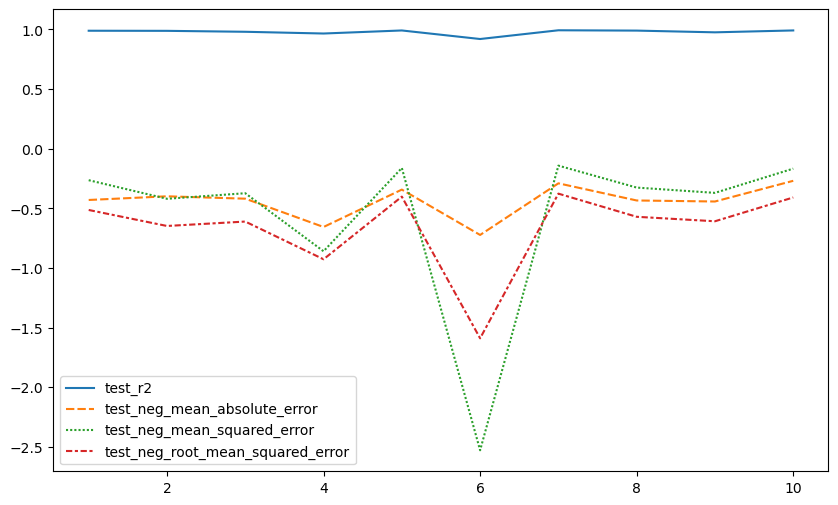

In [53]:
# Elde edilen skorlari grafik halinde gorelim;

sns.lineplot(data = scores.iloc[:, 2:]);

* RMSE'nin MAE'den dusuk cikmasinin nedeni; RMSE'nin dusuk hatalari odullendirmis olmasidir. 

In [54]:
# Ridge modelden elde ettigim coef lere bakalim

ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163202e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

* 55 featurenin her birinden bir insight aldi. Bunlari df yapalim ki sonra karsilastirabilelim.

In [55]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_alpha=1"])
rm_df

ridge_coef_alpha=1
0             3.428822
1             0.689086
2             0.170305
3            -0.910850
4             2.723077
5             0.112909
6            -0.404686
7             0.287950
8            -0.091937
9            -1.014535
10           -0.075344
11           -0.708634
12            1.473254
13            0.148905
14            0.005407
15           -0.471916
16            0.031128
17           -0.091424
18            0.109397
19           -0.294351
20           -0.069994
21           -0.179886
22           -0.482892
23           -0.241550
24           -0.070462
25            0.781238
26           -0.032908
27            0.002162
28           -0.028680
29           -0.186743
30            0.011304
31           -0.070924
32           -0.035974
33            0.126281
34            0.453132
35            0.490794
36            0.492974
37           -0.288061
38            0.271084
39            0.321891
40           -0.829983
41           -0.203685
42            0.135190
43           -0.009810
44            0.354290
45           -0.169830
46            0.101346
47           -0.039472
48           -0.236645
49            0.165347
50            0.030197
51            0.009304
52            0.024671
53           -0.050716
54           -0.041555

In [56]:
# Linear modele ait sonuclari Ridge Regresyona ait sonuclarla karsilastiralim; 

pd.concat([lm_df, rm_df], axis = 1)

lm_coef_  ridge_coef_alpha=1
0    13.942084            3.428822
1    -3.147845            0.689086
2     0.622117            0.170305
3   -58.348614           -0.910850
4    17.227695            2.723077
5    -3.875031            0.112909
6    14.688014           -0.404686
7     0.835494            0.287950
8    -2.765824           -0.091937
9   115.503087           -1.014535
10  -28.684170           -0.075344
11   20.257596           -0.708634
12   -7.338979            1.473254
13  -19.840491            0.148905
14    9.183389            0.005407
15  -25.162985           -0.471916
16  -16.859628            0.031128
17   22.723785           -0.091424
18   -3.581168            0.109397
19 -103.955734           -0.294351
20   28.837309           -0.069994
21  -35.712475           -0.179886
22   -3.671007           -0.482892
23   39.849162           -0.241550
24  -15.897735           -0.070462
25    3.956800            0.781238
26    5.331437           -0.032908
27    7.516232            0.002162
28  -14.305237           -0.028680
29   22.095444           -0.186743
30   23.111981            0.011304
31  -12.074690           -0.070924
32  -29.920346           -0.035974
33   22.775684            0.126281
34   34.742828            0.453132
35  -12.527750            0.490794
36   18.231022            0.492974
37   11.082281           -0.288061
38  -24.335582            0.271084
39   13.039461            0.321891
40  -11.738058           -0.829983
41    7.369086           -0.203685
42  -15.865076            0.135190
43    8.171488           -0.009810
44    8.933054            0.354290
45  -10.070050           -0.169830
46    1.904587            0.101346
47    7.065967           -0.039472
48   -0.257477           -0.236645
49  -10.689878            0.165347
50   -5.390108            0.030197
51   -1.578588            0.009304
52   11.400894            0.024671
53    6.352215           -0.050716
54  -13.457603           -0.041555

* Ridge bazi katsayilari kucultmus burada.

* Ridge ile feature selection yailamaz.
* Dusuk katsayilar onemsiz, buyukler onemli diyemeyiz.

**Bu katsayilari hesaplarken alpha = 1 alindi default olarak Acaba gercekten allpha 1 mi olmali? Buna asagida karar verecegiz.** 

## Choosing best alpha value with Cross-Validation

*Hyper parametre secimi

* **En iyi alpha degerini bulmaya calisacagim.**

*Alpha 0 olamaz, bunun haricindeki her degeri alabilir. 

In [57]:
# 0.01 ile 1 arasinda 100 tae esit aralikli deger olsutur. 

alpha_space = np.linspace(0.01, 1, 100) # 1 kere olustur, her modelde bunu kullanabilirsin. 0.01 in altina dusersen model dogrusal modele doner.
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [58]:
# Hyper parametre secimi (Ridge ve CV yi bir arada kullaniyoruz burada); 

ridge_cv_model = RidgeCV(alphas = alpha_space, cv= 10, scoring = "neg_root_mean_squared_error") # ridgeCV dealphas var, birden fazla alpha verebiliyoruz. Biz aralik verdik.

In [59]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

* Buradaki tum degerleri alfa olarak kullaniyor siratyla, RMSE nin min oldugu yerdeki alfaya best alfa diyor ve bunu kullanarak elde ettigi skoru da best skor olarak rapor ediyor. 

In [60]:
ridge_cv_model.alpha_ # Best alfayi buldu.

0.02

 * ideal (en iyi) alpha 0.02 imis. Yukaridaki  ridge_cv_model  alpha = 0.02 ile calisiyor. Asagida bunu uyuladigimizda bu alpha il calisiyor. 

* Araligi 0-500 yaparak, CV yi 50 yaparak Kagglede daha iyi sonuclar elde edilebilir. 



In [61]:
# En iyi (best) skoru bulalim.

ridge_cv_model.best_score_

-0.5683736426878261

* En iyi RMSE bu imis. Daha once bu 0.72 idi, simdi dustu. 

In [62]:
y_pred = ridge_cv_model.predict(X_test_scaled) # Ridge(alpha =0.02)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [63]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

ridge_cv_train  ridge_cv_test
R2          0.994491       0.983643
mae         0.244842       0.442087
mse         0.144977       0.461803
rmse        0.380758       0.679561

* R2 Train modelde 0.99'a cikti, testte 0.98. Birbiriyle uyumlu.

In [64]:
# CV sonuclarini topluca degerlendirmek istiyoruz


pd.concat([ls, rs, rcs], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  ridge_cv_train  \
R2        0.997607     0.764990     0.988677    0.982511        0.994491   
mae       0.186213     0.665959     0.338149    0.482446        0.244842   
mse       0.062968     6.634847     0.297970    0.493743        0.144977   
rmse      0.250934     2.575820     0.545866    0.702669        0.380758   

      ridge_cv_test  
R2         0.983643  
mae        0.442087  
mse        0.461803  
rmse       0.679561

* Sonuclar birbiriyle uyumlu. Ozellikle ridge CV deki souclar en iyi ve birbiriyle uyumlu. O zaman biz bu modeli secer, sonraki asamalarda DEPLOY ederiz. 

In [65]:
ridge_cv_model.coef_

array([ 6.38304734e+00,  7.09275340e-01,  4.78837861e-01, -8.01548273e+00,
        3.99781291e+00, -7.14940285e-01, -5.09197284e-01,  7.27011610e-01,
       -8.83004868e-01,  2.24464524e+00, -3.19078191e+00, -8.74842987e-01,
        2.27543377e+00, -1.68730719e-01,  2.45578671e-01, -1.07397334e+00,
        7.07464247e-01, -1.51041420e+00,  1.39606956e+00,  3.19053345e+00,
        3.43601487e+00,  1.70954795e+00, -3.10657026e+00,  1.14268093e+00,
        3.21642379e-01,  1.73550780e+00, -9.42863852e-01, -4.20562003e-01,
       -3.39615652e-01, -4.52821031e-01,  5.50773131e-01, -9.34156866e-01,
        7.19128412e-02,  9.44445636e-01, -2.06804453e+00, -1.08621135e+00,
       -4.57557156e-01,  2.52819257e+00, -1.72169300e+00, -1.98950183e-01,
       -3.27642238e+00,  1.71668615e+00,  6.16710965e-01, -5.77460875e-03,
        1.41470288e+00, -9.16647115e-01, -1.48199234e-02,  5.87215930e-01,
       -4.21611654e-01,  5.23332129e-01, -4.18184387e-01,  3.63466766e-01,
        7.33072666e-01, -

In [66]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns = ["ridge_cv_coef_0.02"])
rcm_df

ridge_cv_coef_0.02
0             6.383047
1             0.709275
2             0.478838
3            -8.015483
4             3.997813
5            -0.714940
6            -0.509197
7             0.727012
8            -0.883005
9             2.244645
10           -3.190782
11           -0.874843
12            2.275434
13           -0.168731
14            0.245579
15           -1.073973
16            0.707464
17           -1.510414
18            1.396070
19            3.190533
20            3.436015
21            1.709548
22           -3.106570
23            1.142681
24            0.321642
25            1.735508
26           -0.942864
27           -0.420562
28           -0.339616
29           -0.452821
30            0.550773
31           -0.934157
32            0.071913
33            0.944446
34           -2.068045
35           -1.086211
36           -0.457557
37            2.528193
38           -1.721693
39           -0.198950
40           -3.276422
41            1.716686
42            0.616711
43           -0.005775
44            1.414703
45           -0.916647
46           -0.014820
47            0.587216
48           -0.421612
49            0.523332
50           -0.418184
51            0.363467
52            0.733073
53           -0.100478
54           -1.165271

In [67]:
pd.concat([lm_df, rm_df, rcm_df], axis = 1) # katsayilari karsilastirmak istiyoruz.

lm_coef_  ridge_coef_alpha=1  ridge_cv_coef_0.02
0    13.942084            3.428822            6.383047
1    -3.147845            0.689086            0.709275
2     0.622117            0.170305            0.478838
3   -58.348614           -0.910850           -8.015483
4    17.227695            2.723077            3.997813
5    -3.875031            0.112909           -0.714940
6    14.688014           -0.404686           -0.509197
7     0.835494            0.287950            0.727012
8    -2.765824           -0.091937           -0.883005
9   115.503087           -1.014535            2.244645
10  -28.684170           -0.075344           -3.190782
11   20.257596           -0.708634           -0.874843
12   -7.338979            1.473254            2.275434
13  -19.840491            0.148905           -0.168731
14    9.183389            0.005407            0.245579
15  -25.162985           -0.471916           -1.073973
16  -16.859628            0.031128            0.707464
17   22.723785           -0.091424           -1.510414
18   -3.581168            0.109397            1.396070
19 -103.955734           -0.294351            3.190533
20   28.837309           -0.069994            3.436015
21  -35.712475           -0.179886            1.709548
22   -3.671007           -0.482892           -3.106570
23   39.849162           -0.241550            1.142681
24  -15.897735           -0.070462            0.321642
25    3.956800            0.781238            1.735508
26    5.331437           -0.032908           -0.942864
27    7.516232            0.002162           -0.420562
28  -14.305237           -0.028680           -0.339616
29   22.095444           -0.186743           -0.452821
30   23.111981            0.011304            0.550773
31  -12.074690           -0.070924           -0.934157
32  -29.920346           -0.035974            0.071913
33   22.775684            0.126281            0.944446
34   34.742828            0.453132           -2.068045
35  -12.527750            0.490794           -1.086211
36   18.231022            0.492974           -0.457557
37   11.082281           -0.288061            2.528193
38  -24.335582            0.271084           -1.721693
39   13.039461            0.321891           -0.198950
40  -11.738058           -0.829983           -3.276422
41    7.369086           -0.203685            1.716686
42  -15.865076            0.135190            0.616711
43    8.171488           -0.009810           -0.005775
44    8.933054            0.354290            1.414703
45  -10.070050           -0.169830           -0.916647
46    1.904587            0.101346           -0.014820
47    7.065967           -0.039472            0.587216
48   -0.257477           -0.236645           -0.421612
49  -10.689878            0.165347            0.523332
50   -5.390108            0.030197           -0.418184
51   -1.578588            0.009304            0.363467
52   11.400894            0.024671            0.733073
53    6.352215           -0.050716           -0.100478
54  -13.457603           -0.041555           -1.165271

* alpha kuculdukce katsayilar buyumeye baslar. Featurelerden alacagi insight leri alpha ile belirliyoruz. 


* **ONEMLI!!!:** Best Alfa = 1 cikarsa 1 ile 2 arasia 100 deger ver tekrar incle, best alfa 2 cikarsa 2 ile 3 arasinda 100 deger ver ve dene bir daha.  Ama alfa 0.01 cikarsa bunun daha altina inilmez, 0.01 i kullaniriz tahminde. 

alpha_space = np.linspace(1, 2, 100) # kodu ile 1 ile 2 arasında 100 değer oluşturur ve modeli yeniden çalıştırarak alfa değerini bulmaya çalışırız.



In [68]:
kalsik < Ridge < Ridge CV  daha guclu sonuclar cikiyor. 

SyntaxError: invalid syntax (184118058.py, line 1)

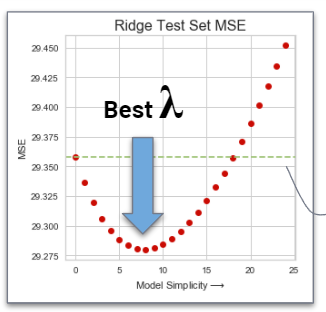

In [ ]:
Alfayi kendi kafamiza gore veremeyiz, belli bir araliktan sectirecegiz.

## LASSO

In [88]:
# Lasso kutuphanesini cagiralim;

from sklearn.linear_model import Lasso, LassoCV

In [89]:
# Atama yapalim

lasso_model = Lasso(alpha=1.0, random_state = 42)

In [90]:
# Modeli fit edelim

lasso_model.fit(X_train_scaled, y_train) 

Lasso(random_state=42)

In [91]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [92]:
y_pred

array([13.72879588, 18.5773566 , 12.22322841, 15.66314409, 10.2954991 ,
        9.7053682 , 19.37160689, 16.52020324, 10.65781551, 18.76429894,
       11.14751313, 13.52429214, 11.8526618 , 21.2294146 , 18.05366662,
       10.80381465, 12.36026963, 10.14947528, 10.24264488, 20.17173698,
        9.79519964, 17.80914412, 25.79384437, 23.1503495 , 10.46470617,
       11.52163201, 20.22516024, 10.4646202 , 12.33304717, 10.19275926,
       10.2957163 , 18.80357707, 11.02139493,  9.54807591, 16.91828449,
       10.17433953, 11.02371646, 10.48279468,  9.76979929, 10.94082447,
       12.39627933, 10.6790454 , 11.51468654,  9.80336514, 12.00130773,
       11.28620648,  9.4325469 , 14.88255813, 12.77164622, 20.66750109,
       11.43067766, 12.76069869, 14.51862762, 12.00377165, 11.41620938,
        9.30161162, 23.75876758, 11.25704262, 17.01721122, 14.82152154])

In [93]:
y_train_pred

array([14.56489127, 24.6437433 ,  9.88005016, 19.62841179, 12.06388695,
       20.95423556, 14.95052258, 13.72560613, 15.15064901, 16.22178106,
       11.99602872, 10.56056123, 15.77523714,  9.91315888, 10.80492125,
       20.52787058, 13.16315017, 23.80209827,  9.49432608, 13.24123267,
       15.65371364, 12.86271098, 10.01984588, 20.66757182, 17.98829381,
       15.43224246,  9.43405407, 12.06064311, 19.80714113, 12.41677014,
        9.49907744, 12.4562799 , 12.01213323, 10.99279489, 11.57967123,
       14.38095191, 10.89564701, 13.83705079, 13.10224424, 11.45266624,
       12.49975893, 24.54238183, 11.11835524, 11.02544809, 15.17499837,
       18.06801372,  9.33129704, 15.70843904, 23.0200922 , 12.02444904,
       12.32308522, 11.68279665, 11.06403577, 19.18585861, 16.5839103 ,
       21.05210397, 17.98963138, 12.21984751, 20.66919318, 12.26761065,
       17.07187092, 13.93735148, 12.87665396, 11.69145836, 15.50541742,
       19.31076569, 14.72914602, 24.12991485, 18.71199087, 21.99

In [94]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

lasso_train  lasso_test
R2       0.919650    0.918590
mae      1.018355    1.017959
mse      2.114491    2.298390
rmse     1.454129    1.516044

In [ ]:
pd.concat([ls, rs, rcs, lss], axis = 1)

* Lasso da R2 dustugu icin **underfitting** var. 
* Lasso alfa = 1 ile calsiti. 
* Acaba LASSO'nun alfasini degistirsem sonuc iyilesir mi? Buna bakalim. 

In [ ]:
# Modeli sifirlayip yeniden bir model kuracagiz. CV yapiyoruz ki traine ait sonuclardan emin olalim. 



model = Lasso(alpha = 1, random_state = 42) 
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)


In [ ]:
pd.DataFrame(scores, index = range(1, 11))

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

* CV de elde edilen sonuclar Lasso isleminin sonucu ile uyumlu oldugu icin OVERFIT yok, ama diger modellerel karsilastirinca UNDERFIT var.

In [ ]:
# Lasso dan gelen coef lere bakalim;

lasso_model.coef_


* Lasso katliam yapmis, 53 kelle almis, 2 sag var :) Alpha = 1 buyuk o edenle cok kelle almis. Alpha duserse daha az kelle gidecek.

* Model complexity si azalmis. 

* Alfayi yuksek tutarsak UNDERFIT e gidiyor. Burada alfa = 1

* 55 feature ile  %98 basari mi istersin 2 feature ile %961 basari mi istersin diye musteriye soracagiz. 

* lasso EN AZ FEATURE ILE EN YUKSEK SKORU ALMAYA CALISIR. 

* **Feature selection** yapiyor!!!!.

* **Feature selection** denirse hemen LASSO yu hatirlayalim!!!

In [96]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [97]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

lm_coef_  ridge_coef_alpha=1  ridge_cv_coef_0.02  lasso_coef_1
0    13.942084            3.428822            6.383047      0.696016
1    -3.147845            0.689086            0.709275      0.000000
2     0.622117            0.170305            0.478838      0.000000
3   -58.348614           -0.910850           -8.015483      0.000000
4    17.227695            2.723077            3.997813      3.490946
5    -3.875031            0.112909           -0.714940      0.000000
6    14.688014           -0.404686           -0.509197      0.000000
7     0.835494            0.287950            0.727012      0.000000
8    -2.765824           -0.091937           -0.883005      0.000000
9   115.503087           -1.014535            2.244645      0.000000
10  -28.684170           -0.075344           -3.190782      0.000000
11   20.257596           -0.708634           -0.874843      0.000000
12   -7.338979            1.473254            2.275434      0.000000
13  -19.840491            0.148905           -0.168731      0.000000
14    9.183389            0.005407            0.245579      0.000000
15  -25.162985           -0.471916           -1.073973      0.000000
16  -16.859628            0.031128            0.707464      0.000000
17   22.723785           -0.091424           -1.510414      0.000000
18   -3.581168            0.109397            1.396070      0.000000
19 -103.955734           -0.294351            3.190533      0.000000
20   28.837309           -0.069994            3.436015      0.000000
21  -35.712475           -0.179886            1.709548      0.000000
22   -3.671007           -0.482892           -3.106570      0.000000
23   39.849162           -0.241550            1.142681      0.000000
24  -15.897735           -0.070462            0.321642      0.000000
25    3.956800            0.781238            1.735508      0.000000
26    5.331437           -0.032908           -0.942864      0.000000
27    7.516232            0.002162           -0.420562      0.000000
28  -14.305237           -0.028680           -0.339616      0.000000
29   22.095444           -0.186743           -0.452821      0.000000
30   23.111981            0.011304            0.550773      0.000000
31  -12.074690           -0.070924           -0.934157      0.000000
32  -29.920346           -0.035974            0.071913      0.000000
33   22.775684            0.126281            0.944446      0.000000
34   34.742828            0.453132           -2.068045      0.000000
35  -12.527750            0.490794           -1.086211      0.000000
36   18.231022            0.492974           -0.457557      0.000000
37   11.082281           -0.288061            2.528193      0.000000
38  -24.335582            0.271084           -1.721693      0.000000
39   13.039461            0.321891           -0.198950      0.000000
40  -11.738058           -0.829983           -3.276422      0.000000
41    7.369086           -0.203685            1.716686      0.000000
42  -15.865076            0.135190            0.616711      0.000000
43    8.171488           -0.009810           -0.005775      0.000000
44    8.933054            0.354290            1.414703      0.000000
45  -10.070050           -0.169830           -0.916647      0.000000
46    1.904587            0.101346           -0.014820      0.000000
47    7.065967           -0.039472            0.587216      0.000000
48   -0.257477           -0.236645           -0.421612      0.000000
49  -10.689878            0.165347            0.523332      0.000000
50   -5.390108            0.030197           -0.418184      0.000000
51   -1.578588            0.009304            0.363467      0.000000
52   11.400894            0.024671            0.733073      0.000000
53    6.352215           -0.050716           -0.100478      0.000000
54  -13.457603           -0.041555           -1.165271      0.000000

### Optimum Alfayi secelim

In [109]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter=100000, random_state= 42)
# max_iter ; maximum iterasyon sayisi. Hata verirse  artir bunu.
# max_iter icin her islem bir iterasyon oldugundan "en iyi skora ulasamadim" hatasi alabiliriz. 
# Bu nedenle default olan max_iter=1000 i artirdik

In [110]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000, random_state=42)

In [111]:
lasso_cv_model.alpha_

0.01

* Demek ki optimum alpha 0.01 imis. 

In [112]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [113]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

lasso_cv_train  lasso_cv_test
R2          0.988824       0.986295
mae         0.339065       0.440975
mse         0.294098       0.386919
rmse        0.542308       0.622028

In [114]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  ridge_cv_train  \
R2        0.997607     0.764990     0.988677    0.982511        0.994491   
mae       0.186213     0.665959     0.338149    0.482446        0.244842   
mse       0.062968     6.634847     0.297970    0.493743        0.144977   
rmse      0.250934     2.575820     0.545866    0.702669        0.380758   

      ridge_cv_test  lasso_train  lasso_test  lasso_cv_train  lasso_cv_test  
R2         0.983643     0.919650    0.918590        0.988824       0.986295  
mae        0.442087     1.018355    1.017959        0.339065       0.440975  
mse        0.461803     2.114491    2.298390        0.294098       0.386919  
rmse       0.679561     1.454129    1.516044        0.542308       0.622028

* En iyi sonucu LASSO verdi, o halde bunu tercih edecegiz. 
* * RMSE nin MAE ile uyumu iyi, outlier beklemiyoruz. 

In [115]:
lasso_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [117]:
def color_red_zero(val):
    """Uçan kelleler kırmızı"""
    if val == 0.0:
        color = 'red'
    else:
        color = 'black'
    return f'color : {color}'

In [122]:
pd.concat([lm_df, rm_df, rcm_df, lcm_df], axis = 1).style.applymap(color_red_zero) # From Adem Bey :)

In [ ]:
# Elimizde kalan 10 feature ile yolumuza devam edebiliriz. 

In [121]:
# Alpha = 0.01 ile modeli tahmin edelim;

lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [123]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

lm_coef_  ridge_coef_alpha=1  ridge_cv_coef_0.02  lasso_coef_1  \
0    13.942084            3.428822            6.383047      0.696016   
1    -3.147845            0.689086            0.709275      0.000000   
2     0.622117            0.170305            0.478838      0.000000   
3   -58.348614           -0.910850           -8.015483      0.000000   
4    17.227695            2.723077            3.997813      3.490946   
5    -3.875031            0.112909           -0.714940      0.000000   
6    14.688014           -0.404686           -0.509197      0.000000   
7     0.835494            0.287950            0.727012      0.000000   
8    -2.765824           -0.091937           -0.883005      0.000000   
9   115.503087           -1.014535            2.244645      0.000000   
10  -28.684170           -0.075344           -3.190782      0.000000   
11   20.257596           -0.708634           -0.874843      0.000000   
12   -7.338979            1.473254            2.275434      0.000000   
13  -19.840491            0.148905           -0.168731      0.000000   
14    9.183389            0.005407            0.245579      0.000000   
15  -25.162985           -0.471916           -1.073973      0.000000   
16  -16.859628            0.031128            0.707464      0.000000   
17   22.723785           -0.091424           -1.510414      0.000000   
18   -3.581168            0.109397            1.396070      0.000000   
19 -103.955734           -0.294351            3.190533      0.000000   
20   28.837309           -0.069994            3.436015      0.000000   
21  -35.712475           -0.179886            1.709548      0.000000   
22   -3.671007           -0.482892           -3.106570      0.000000   
23   39.849162           -0.241550            1.142681      0.000000   
24  -15.897735           -0.070462            0.321642      0.000000   
25    3.956800            0.781238            1.735508      0.000000   
26    5.331437           -0.032908           -0.942864      0.000000   
27    7.516232            0.002162           -0.420562      0.000000   
28  -14.305237           -0.028680           -0.339616      0.000000   
29   22.095444           -0.186743           -0.452821      0.000000   
30   23.111981            0.011304            0.550773      0.000000   
31  -12.074690           -0.070924           -0.934157      0.000000   
32  -29.920346           -0.035974            0.071913      0.000000   
33   22.775684            0.126281            0.944446      0.000000   
34   34.742828            0.453132           -2.068045      0.000000   
35  -12.527750            0.490794           -1.086211      0.000000   
36   18.231022            0.492974           -0.457557      0.000000   
37   11.082281           -0.288061            2.528193      0.000000   
38  -24.335582            0.271084           -1.721693      0.000000   
39   13.039461            0.321891           -0.198950      0.000000   
40  -11.738058           -0.829983           -3.276422      0.000000   
41    7.369086           -0.203685            1.716686      0.000000   
42  -15.865076            0.135190            0.616711      0.000000   
43    8.171488           -0.009810           -0.005775      0.000000   
44    8.933054            0.354290            1.414703      0.000000   
45  -10.070050           -0.169830           -0.916647      0.000000   
46    1.904587            0.101346           -0.014820      0.000000   
47    7.065967           -0.039472            0.587216      0.000000   
48   -0.257477           -0.236645           -0.421612      0.000000   
49  -10.689878            0.165347            0.523332      0.000000   
50   -5.390108            0.030197           -0.418184      0.000000   
51   -1.578588            0.009304            0.363467      0.000000   
52   11.400894            0.024671            0.733073      0.000000   
53    6.352215           -0.050716           -0.100478      0.000000   
54  -13.457603           -0.041555           -

In [ ]:
## https://www.youtube.com/watch?v=4jRBRDbJemM  ROC-- AUC ile ilgili izle...

In [ ]:
# Grid Search kaldi...

In [ ]:
# Grid Search bize Lasso mu Ridge mi kullanilmasi gerektigini verecek 

## ELASTIC NET

* Hem L1, hem de L2 bir arada kullaniliyor. 
* Alpha<0.5 ise Ridge, Alpha>0.5 ise LASSO yapiyor.  


* !!! Elastic neti sadece Linear modelde kullaniriz, diger modeller bunu icsel olarak yapiyor. Bunu yapmaya gerek yok. 

In [69]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

Ilk deger default ayarlarla olacak, sonra CV li ve optimum alphali calis bitir.

In [70]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # l1_ratio=0.5 her ikisine de gidebilir. L1 de yapabilir, L2 de.
elastic_model.fit(X_train_scaled, y_train) # Modeli fit ettik, egittik

ElasticNet(alpha=1, random_state=42)

In [98]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [72]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

elastic_train  elastic_test
R2         0.896126      0.902016
mae        1.248480      1.200654
mse        2.733565      2.766287
rmse       1.653350      1.663216

* En son Elastic - Net tahminine ait eval metric leri verdi. 

* Bu en kotu skor. 

In [99]:
pd.concat([ls, rs, rcs, lcs, es], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  ridge_cv_train  \
R2        0.997607     0.764990     0.988677    0.982511        0.994491   
mae       0.186213     0.665959     0.338149    0.482446        0.244842   
mse       0.062968     6.634847     0.297970    0.493743        0.144977   
rmse      0.250934     2.575820     0.545866    0.702669        0.380758   

      ridge_cv_test  lasso_cv_train  lasso_cv_test  elastic_train  \
R2         0.983643        0.896126       0.902016       0.896126   
mae        0.442087        1.248480       1.200654       1.248480   
mse        0.461803        2.733565       2.766287       2.733565   
rmse       0.679561        1.653350       1.663216       1.653350   

      elastic_test  
R2        0.902016  
mae       1.200654  
mse       2.766287  
rmse      1.663216

* Bu en kotu skor.


## CV yapalim

In [100]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)

In [81]:
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [101]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

test_r2  test_neg_mean_absolute_error  test_neg_mean_squared_error  \
1   0.941946                     -1.066213                    -1.420073   
2   0.896184                     -1.412626                    -3.727403   
3   0.943570                     -0.838742                    -1.075660   
4   0.912964                     -1.079273                    -2.192921   
5   0.927746                     -1.048461                    -1.367174   
6   0.779091                     -1.710796                    -6.963506   
7   0.947015                     -0.766668                    -1.078353   
8   0.828893                     -2.086681                    -5.756482   
9   0.855858                     -1.234090                    -2.210143   
10  0.821285                     -1.669600                    -3.579193   

    test_neg_root_mean_squared_error  
1                          -1.191668  
2                          -1.930648  
3                          -1.037140  
4                          -1.480851  
5                          -1.169262  
6                          -2.638845  
7                          -1.038438  
8                          -2.399267  
9                          -1.486655  
10                         -1.891875

In [102]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

elastic_train  elastic_test
R2         0.896126      0.902016
mae        1.248480      1.200654
mse        2.733565      2.766287
rmse       1.653350      1.663216

* Sonuc cok iyi degil UNDERFIT var burada. RMSE ler birbiriyle cok uyumlu. OVERFIT yok. 

In [103]:
elastic_model.coef_

array([ 0.8629361 ,  0.2114429 ,  0.        ,  0.29076735,  0.98099122,
        0.00249769,  0.        ,  0.        ,  0.        ,  0.        ,
        0.52021768,  0.        ,  0.6023984 ,  0.09615974,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15970242,  0.        ,  0.27423182,  0.        ,  0.        ,
        0.3407246 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0826519 ,  0.        ,  0.        ,  0.        ,  0.15709256,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

* Goruldugu gibi alpha = 1 alinca model LASSO olarak calisti. 

In [124]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [125]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

lm_coef_  ridge_coef_alpha=1  ridge_cv_coef_0.02  lasso_coef_1  \
0    13.942084            3.428822            6.383047      0.696016   
1    -3.147845            0.689086            0.709275      0.000000   
2     0.622117            0.170305            0.478838      0.000000   
3   -58.348614           -0.910850           -8.015483      0.000000   
4    17.227695            2.723077            3.997813      3.490946   
5    -3.875031            0.112909           -0.714940      0.000000   
6    14.688014           -0.404686           -0.509197      0.000000   
7     0.835494            0.287950            0.727012      0.000000   
8    -2.765824           -0.091937           -0.883005      0.000000   
9   115.503087           -1.014535            2.244645      0.000000   
10  -28.684170           -0.075344           -3.190782      0.000000   
11   20.257596           -0.708634           -0.874843      0.000000   
12   -7.338979            1.473254            2.275434      0.000000   
13  -19.840491            0.148905           -0.168731      0.000000   
14    9.183389            0.005407            0.245579      0.000000   
15  -25.162985           -0.471916           -1.073973      0.000000   
16  -16.859628            0.031128            0.707464      0.000000   
17   22.723785           -0.091424           -1.510414      0.000000   
18   -3.581168            0.109397            1.396070      0.000000   
19 -103.955734           -0.294351            3.190533      0.000000   
20   28.837309           -0.069994            3.436015      0.000000   
21  -35.712475           -0.179886            1.709548      0.000000   
22   -3.671007           -0.482892           -3.106570      0.000000   
23   39.849162           -0.241550            1.142681      0.000000   
24  -15.897735           -0.070462            0.321642      0.000000   
25    3.956800            0.781238            1.735508      0.000000   
26    5.331437           -0.032908           -0.942864      0.000000   
27    7.516232            0.002162           -0.420562      0.000000   
28  -14.305237           -0.028680           -0.339616      0.000000   
29   22.095444           -0.186743           -0.452821      0.000000   
30   23.111981            0.011304            0.550773      0.000000   
31  -12.074690           -0.070924           -0.934157      0.000000   
32  -29.920346           -0.035974            0.071913      0.000000   
33   22.775684            0.126281            0.944446      0.000000   
34   34.742828            0.453132           -2.068045      0.000000   
35  -12.527750            0.490794           -1.086211      0.000000   
36   18.231022            0.492974           -0.457557      0.000000   
37   11.082281           -0.288061            2.528193      0.000000   
38  -24.335582            0.271084           -1.721693      0.000000   
39   13.039461            0.321891           -0.198950      0.000000   
40  -11.738058           -0.829983           -3.276422      0.000000   
41    7.369086           -0.203685            1.716686      0.000000   
42  -15.865076            0.135190            0.616711      0.000000   
43    8.171488           -0.009810           -0.005775      0.000000   
44    8.933054            0.354290            1.414703      0.000000   
45  -10.070050           -0.169830           -0.916647      0.000000   
46    1.904587            0.101346           -0.014820      0.000000   
47    7.065967           -0.039472            0.587216      0.000000   
48   -0.257477           -0.236645           -0.421612      0.000000   
49  -10.689878            0.165347            0.523332      0.000000   
50   -5.390108            0.030197           -0.418184      0.000000   
51   -1.578588            0.009304            0.363467      0.000000   
52   11.400894            0.024671            0.733073      0.000000   
53    6.352215           -0.050716           -0.100478      0.000000   
54  -13.457603           -0.041555           -

* Model Ridge ve Lasso arasi bir durum ortaya cikardi. Biz best sonuca ulasmaya calisacagiz.

In [127]:
# Elastic + CV bia arada

elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], cv = 10,
                                max_iter = 100000, random_state=42)

# Model hem best alphayi bulmaya calisacak, hem L1 ratio icin verdigimiz 6 deger icin deneyecek, her biri icin 10 defa CV yapacak. 

In [128]:
elastic_cv_model.fit(X_train_scaled, y_train)# Modeli fit edelim

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [130]:
elastic_cv_model.alpha_

0.01

In [ ]:
# Best alpha 0.01 imis

In [131]:
elastic_cv_model.l1_ratio_

1.0

In [ ]:
# optimal L1 ratio 1 imis. Yani en iyi sonuc olarak LASSO yu sececek. Ratio 0.06 da ciksaydi LASSO yu sececektik. 
# Bu oran 1' yaklastikca LASSO, 0 a yaklastukca RIDGE yi seceriz.  

ChatCBT :
l1_ratio parametresi, ElasticNet regresyon modelinde L1 ve L2 düzenlemeleri arasındaki oranı belirler. ElasticNet, hem L1 hem de L2 düzenlemesini kullanarak bir hata terimini minimize etmeye çalışan bir regresyon modelidir.

L1 düzenlemesi, modelin katsayıları sıfıra yakınlaştırmaya ve böylece düşük öneme sahip özellikleri seçmeye yardımcı olur. Bu, veri setindeki gürültü veya gereksiz özelliklerin etkisini azaltır.

L2 düzenlemesi, modelin katsayılarının karelerinin toplamını sınırlar. Bu, büyük katsayı değerlerinin yanı sıra çoklu korelasyonlu özelliklerin etkisini azaltmaya yardımcı olur.

l1_ratio parametresi, L1 ve L2 düzenlemeleri arasındaki dengeyi kontrol eder. Değer 0 olduğunda, sadece L2 düzenlemesi kullanılır ve bu da ElasticNet'i Ridge regresyonuna dönüştürür. Değer 1 olduğunda, sadece L1 düzenlemesi kullanılır ve bu da ElasticNet'i LASSO regresyonuna dönüştürür. Değerler arasında bir aralık belirleyerek, L1 ve L2 düzenlemelerinin bir kombinasyonunu elde edebilirsiniz.

Bu şekilde l1_ratio parametresi, modelin hangi düzenlemeyi tercih ettiğini ve katsayıların ne kadar spars olmasını istediğini kontrol etmek için kullanılır. Değerleri genellikle [0, 1] aralığında seçilir, ancak belirli bir projenin gereksinimlerine bağlı olarak bu değerler dışında da seçilebilir.

* L1 ratio 0.5 cikarsa Ridge ile Lasso arasinda farksiz kalir. 

**Analiz sonucunda L1 ratio 0.5 cikabilir mi?**


ChatGPT
Evet, analiz sonucunda L1 ratio değeri 0.5 çıkabilir. L1 ratio, elastik net regresyonu gibi yöntemlerde bir hiperparametredir ve değeri, veri setine ve probleme bağlı olarak değişebilir.

Elastik net regresyonunda, L1 oranı 0 ile 1 arasında bir değer alır. Değer 0 ise sadece L2 düzenlileştirmesi kullanılırken, değer 1 ise sadece L1 düzenlileştirmesi kullanılır. L1 ratio değeri 0.5 olarak çıkabilir, bu da L1 ve L2 düzenlileştirmesinin eşit bir kombinasyonunu gösterir.

Analiz yaparken, hiperparametrelerin (L1 ratio dahil) değerlerini seçmek için genellikle çapraz doğrulama ve model performansını değerlendirme teknikleri kullanılır. Bu süreçte, farklı L1 ratio değerlerini deneyerek ve modelin performansını ölçerek en uygun değeri bulabilirsiniz.

Sonuç olarak, analiz sonucunda L1 ratio'nun 0.5 olarak çıkması mümkündür, ancak en iyi değeri belirlemek için diğer hiperparametrelerle birlikte çapraz doğrulama ve model değerlendirme yöntemlerini kullanmanız önerilir.



**Analiz sonucunda L1 ratio 0.5 ciktiginda ne yapmak gerekir?** 

ChatGPT
Eğer analiz sonucunda L1 ratio değeri 0.5 çıktıysa, bunun anlamı elastik net regresyonunda L1 ve L2 düzenlileştirmesinin eşit bir kombinasyonunun kullanılması gerektiğidir. Bu durumda, genellikle aşağıdaki adımları takip etmek önerilir:

Modelinizi yeniden eğitin: Elde ettiğiniz L1 ratio değeri ile elastik net regresyon modelinizi yeniden eğitin. Bu model, L1 düzenlileştirmesi ve L2 düzenlileştirmesinin dengeli bir kombinasyonunu kullanacak şekilde ayarlanmış olacaktır.

Diğer hiperparametreleri optimize edin: L1 ratio'nun yanı sıra, elastik net regresyonunda diğer hiperparametrelerin (örneğin, alpha, lambda vb.) değerlerini de optimize etmek önemlidir. Bu hiperparametreler, modelin performansını etkileyebilir ve doğru değerlerin seçilmesi modelinizi iyileştirebilir.

Modeli değerlendirin: Yeniden eğitilen elastik net regresyon modelinizi test veri seti üzerinde değerlendirin. Modelin performansını değerlendirmek için uygun metrikleri kullanın, örneğin, ortalama karesel hata (mean squared error, MSE), R-kare (R-squared), doğruluk (accuracy) gibi.

Sonuçları yorumlayın: Elde ettiğiniz sonuçları analiz edin ve yorumlayın. Modelinizin L1 ratio'sunun 0.5 olması, L1 düzenlileştirmesi ve L2 düzenlileştirmesinin dengeli bir şekilde kullanıldığını gösterir. Bu, özellik seçimi ve modelin genel karmaşıklığının kontrolü açısından dikkate değer olabilir.

İyileştirmeler yapın: Modelinizin performansını artırmak için gerekli görülen durumlarda, L1 ratio ve diğer hiperparametrelerin farklı değerlerini deneyebilir, modeli yeniden eğitebilir ve değerlendirme adımlarını tekrarlayabilirsiniz.

Özetlemek gerekirse, L1 ratio'nun 0.5 olarak çıkması, elastik net regresyon modelinde L1 ve L2 düzenlileştirmesinin dengeli bir kombinasyonunu kullanmanız gerektiğini gösterir. Bu değeri kullanarak modelinizi yeniden eğitin, diğer hiperparametreleri optimize edin, modelin performansını değerlendirin ve gerektiğinde iyileştirmeler yapın.


In [132]:
# Alpha scoru Lasso ile ayni mi?

y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [133]:
# Elastic net cv; 

ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

elastic_cv_train  elastic_cv_test
R2            0.896126         0.902016
mae           1.248480         1.200654
mse           2.733565         2.766287
rmse          1.653350         1.663216

In [134]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  ridge_cv_train  \
R2        0.997607     0.764990     0.988677    0.982511        0.994491   
mae       0.186213     0.665959     0.338149    0.482446        0.244842   
mse       0.062968     6.634847     0.297970    0.493743        0.144977   
rmse      0.250934     2.575820     0.545866    0.702669        0.380758   

      ridge_cv_test  lasso_train  lasso_test  lasso_cv_train  lasso_cv_test  \
R2         0.983643     0.919650    0.918590        0.988824       0.986295   
mae        0.442087     1.018355    1.017959        0.339065       0.440975   
mse        0.461803     2.114491    2.298390        0.294098       0.386919   
rmse       0.679561     1.454129    1.516044        0.542308       0.622028   

      elastic_train  elastic_test  elastic_cv_train  elastic_cv_test  
R2         0.896126      0.902016          0.896126         0.902016  
mae        1.248480      1.200654          1.248480         1.200654  
mse        2.733565      2.766287          2.733565         2.766287  
rmse       1.653350      1.663216          1.653350         1.663216

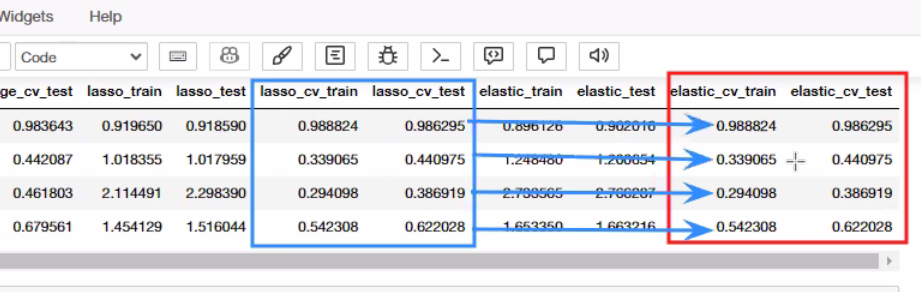

In [ ]:
# "Lasso_cv"  ile "elastic_cv" ye aiit sonuclar ayni. 
# Demek ki optimal model "Alpha = 0.01  ila tahmin edilen LASSO CV" modeli imis.  

* Ridge ve Lasso yu uyguladiktan sonra Elastic Net'e gerek kalmiyor. 

* Cok tercih edilen bir sey degil.

# GRID SEARCH

* Amacimiz modeldeki hyper parametreleri otomatik (icsel) olarak elde etmek. Hangi kombinasyon en iyi sonucu veryor? Buna bakiyoruz. 


* Grid Search en iyi hyper parametre setini verecek bize. 

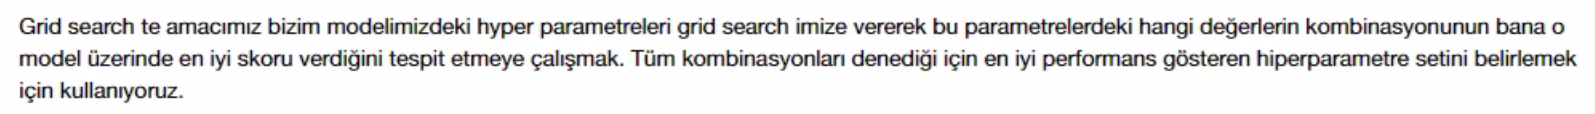


In [135]:
from sklearn.model_selection import GridSearchCV # GridSearch ileCV yi de ayni anda yapiyor

In [137]:
# Modeli sifirlayalim

elastic_model = ElasticNet(max_iter = 100000, random_state = 42)

In [138]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [139]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2) # verbose =2  2 tane bilgi ver bana

In [140]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=100000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [141]:
# En iyi parametrelerin hangileri oldugunu bize soylesin;

grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [ ]:
# Lassoyu sec ve alpha 0.01 olsun diyor. 

In [142]:
# 

pd.DataFrame(grid_model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.029899      0.006087         0.000211        0.000396        0.01   
1        0.005955      0.001600         0.000289        0.000631        0.01   
2        0.005431      0.003543         0.001387        0.002216        0.01   
3        0.008276      0.002722         0.000101        0.000302        0.01   
4        0.007071      0.001052         0.000200        0.000400        0.01   
5        0.006864      0.001402         0.000299        0.000457        0.01   
6        0.006489      0.001181         0.000402        0.000492        0.01   
7        0.022042      0.004488         0.000544        0.000564       0.012   
8        0.003585      0.001545         0.000691        0.000856       0.012   
9        0.004961      0.002089         0.000359        0.000564       0.012   
10       0.006450      0.002608         0.000358        0.000560       0.012   
11       0.006840      0.001653         0.000100        0.000301       0.012   
12       0.006242      0.001246         0.000216        0.000349       0.012   
13       0.005959      0.000956         0.000194        0.000389       0.012   
14       0.003760      0.002090         0.000202        0.000404         0.2   
15       0.001053      0.000151         0.000198        0.000396         0.2   
16       0.000955      0.000569         0.000199        0.000398         0.2   
17       0.000321      0.000493         0.000177        0.000360         0.2   
18       0.001214      0.002372         0.000000        0.000000         0.2   
19       0.001064      0.002723         0.000089        0.000266         0.2   
20       0.001662      0.002986         0.000000        0.000000         0.2   
21       0.002265      0.002080         0.000000        0.000000         0.5   
22       0.001001      0.000538         0.000299        0.000457         0.5   
23       0.001530      0.001439         0.000101        0.000304         0.5   
24       0.001009      0.000239         0.000301        0.000460         0.5   
25       0.000322      0.000466         0.000188        0.000377         0.5   
26       0.001673      0.002569         0.000000        0.000000         0.5   
27       0.000414      0.001049         0.000501        0.001504         0.5   
28       0.001368      0.002760         0.000101        0.000304         0.6   
29       0.000650      0.000873         0.000000        0.000000         0.6   
30       0.000673      0.000471         0.000353        0.000452         0.6   
31       0.001079      0.002575         0.000615        0.001845         0.6   
32       0.001373      0.002574         0.000101        0.000304         0.6   
33       0.000963      0.001650         0.000644        0.001321         0.6   
34       0.001208      0.002012         0.000237        0.000397         0.6   
35       0.002468      0.001985         0.000184        0.000413         0.7   
36       0.001204      0.000403         0.000202        0.000403         0.7   
37       0.000908      0.000382         0.000190        0.000381         0.7   
38       0.001017      0.000406         0.000197        0.000395         0.7   
39       0.000653      0.000448         0.000198        0.000396         0.7   
40       0.000739      0.000601         0.000207        0.000415         0.7   
41       0.000654      0.000453         0.000308        0.000472         0.7   
42       0.001471      0.000628         0.000103        0.000309           1   
43       0.000957      0.000357         0.000202        0.000404           1   
44       0.000703      0.000461         0.000352        0.000555           1   
45       0.000755      0.000405         0.000252        0.000404           1   
46       0.000420      0.000473         0.000000        0.000000           1   
47       0.000764      0.000688         0.001144        0.003044           1   
48       0.000554      0.000572         0.000151        0.000321           1   

   

In [143]:
# En iyi score hangi indexte bunu gostersin

grid_model.best_index_


6

In [ ]:
# 6. indexteski sonuclar bizim icin best results imis. 

In [144]:
grid_model.best_score_

-0.557247382121459

In [ ]:
# Bu score --> RMSE sonucu.

In [145]:
# Artik best hyperparametreleri kullanarak tahmin alalim;

y_pred = grid_model.predict(X_test_scaled) #ElasticNet(alpha=0.01, l1_ratio=0.1) olarakta yazabilirsiniz aynı anlama geliyor.
y_train_pred = grid_model.predict(X_train_scaled)

In [146]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

GridSearch_train  GridSearch_test
R2            0.988824         0.986295
mae           0.339065         0.440975
mse           0.294098         0.386919
rmse          0.542308         0.622028

In [ ]:
# Bu gelen sonuc, yukaridaki LASSO CV'ye ait sonuc. 

# Grid Search bizim modele hangi parametrelerle girmemiz gerektigini soyluyor. 

# Bize dusen bu hyperparametreleri kullanarak final modeli elde etmek. 

# Model iyi ciksin diye [  ] icine belkide 6 degil 200 deger girecegiz ki en iyi denemeyi yapip, THE BEST sonuca ulasabilelim.

# "Optuna" parametre tespiti surecini otomatiklestiriyormus. daha derinlemesine parametre arayışı yapıyor BAKKKKKKKKKKKKKKKK 

In [ ]:
!!!!!!Feature Importance yi burada incele..... Sona birakma 

## Featre Importance

Buradaki onemli olan featurelere yukarida yaptigimiz ridge cv ve lasso cv model ile baktik. Final modeli kullanmadik. 

### Featre Importance with Ridge

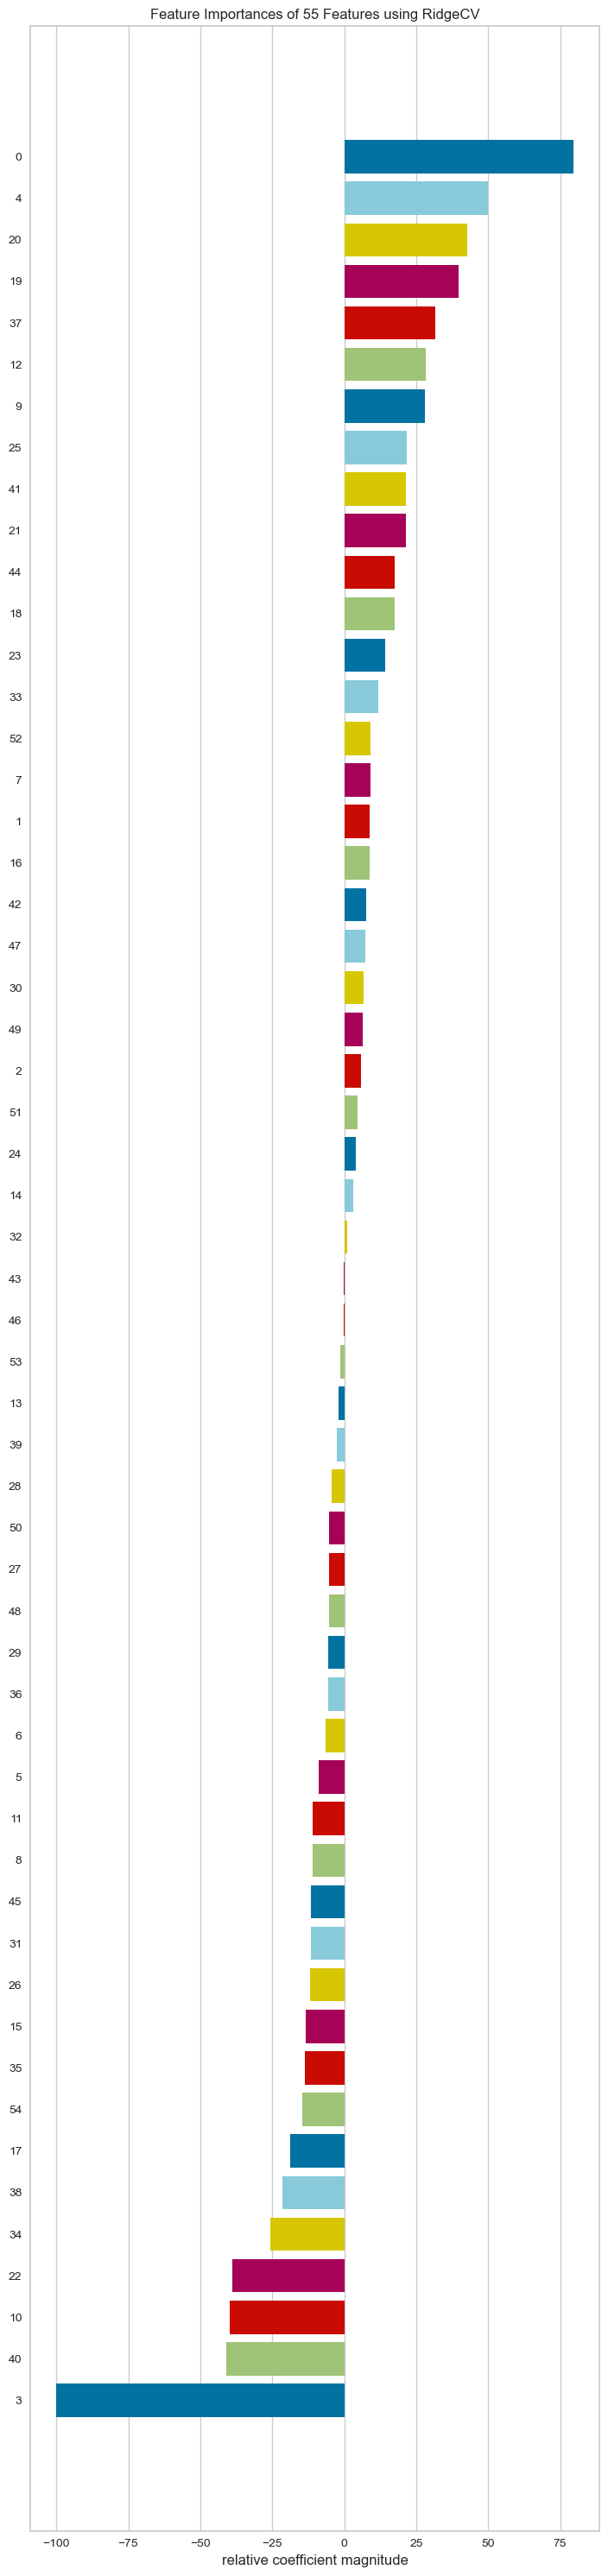

<Axes: title={'center': 'Feature Importances of 55 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [147]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz #figsize gibi işlem yapıyor görseli büyütmek için import ediyoruz altta 720, 3000 dedik

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns) #modeli veriyorum ve X_train column namelerini
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train) # modeli burada fit ediyoruz. ridge_cv_model de scaled edilmis versiyonlar kullanildigi icin bu X_train de scale edilmis oluyor. 
viz.show()

In [ ]:
* Feature selection yapmak icin Ridge yeterli degil. Bu nedenle LASSO ya bakalim;

###  Featre Importance with Lasso

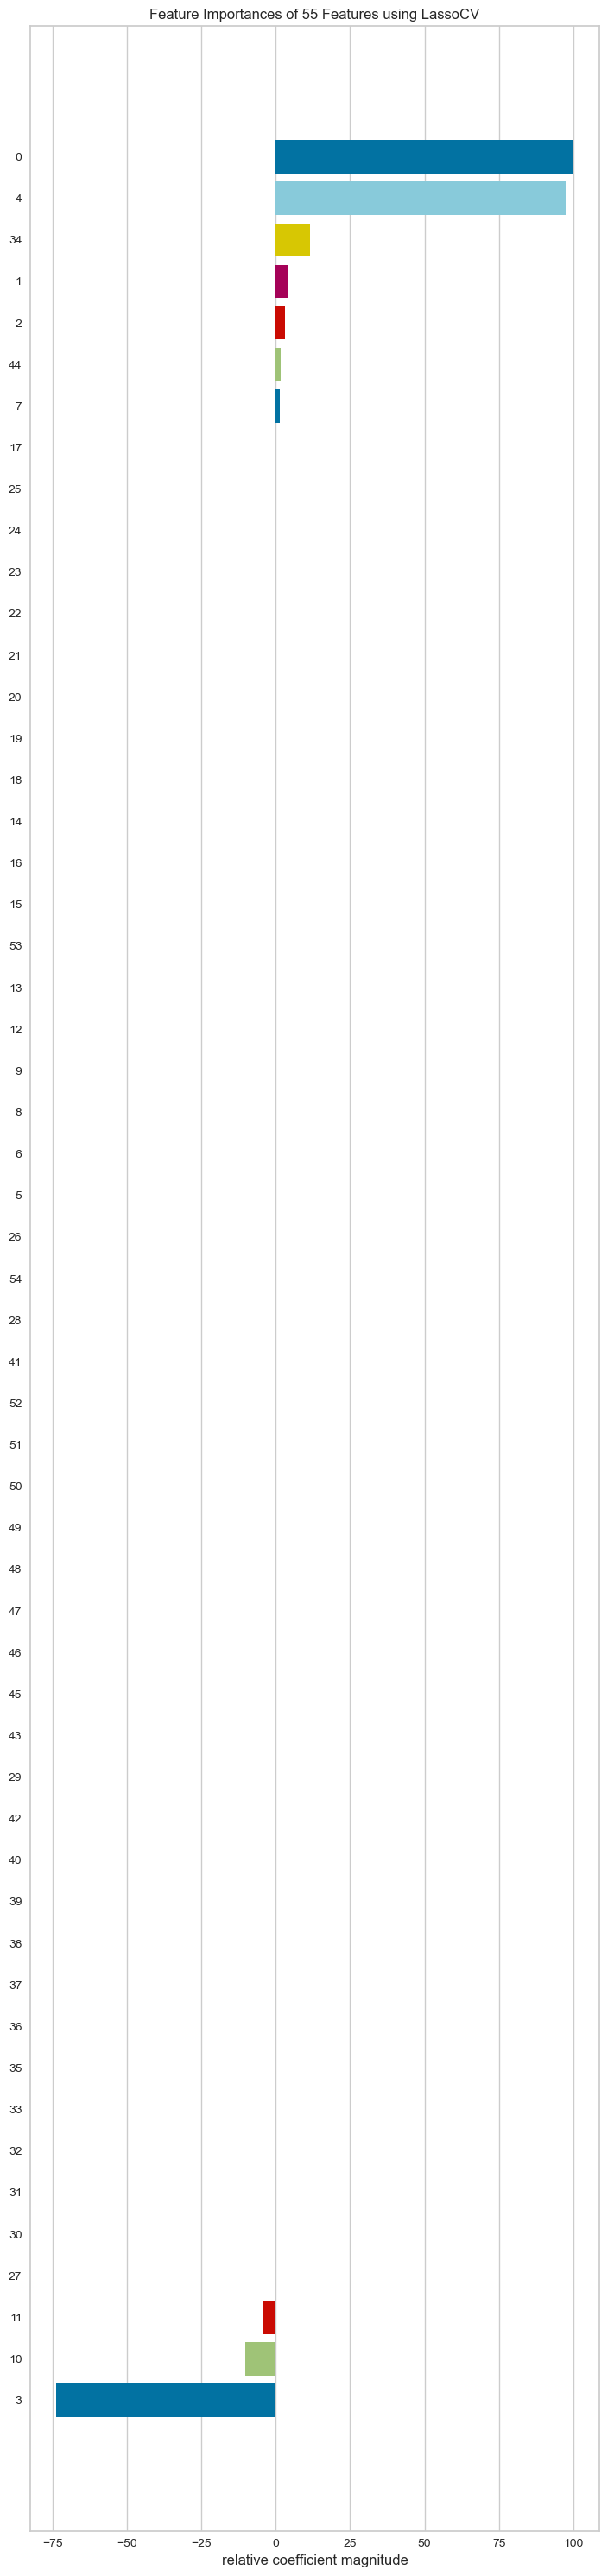

<Axes: title={'center': 'Feature Importances of 55 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [148]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

**Sonuc;** En onemli parametreler 0, 4 ve 3. degiskene ait ait katsayilarmis. 

# FINAL MODEL

In [ ]:
final_scaled = StandardScaler()

In [ ]:
X_scaled = final_scaled.fit_transform(poly_features)  # Burada sadece X ler var. Target yok. 

In [ ]:
final_model = Lasso(alpha = 0.01)

In [ ]:
final_model.fit(X_scaled, y)  #Modeli egitelim (fit edelim)

In [ ]:
# Final modeli kaydedecegiz. 

**YOL HARITASI:** Sadece split, scale, ilkel skoru al, degerlendir.  Grid Seach yap, best modeli tahmin et, sonuclari ilkel sonuclarla karsilastir ve final modeli tahmin et.....

*** Final model sonrasında ben bu modeli kullanmaya başladım. Yeni verilerde bu modeli kullandım. Bu verilerin target sonuçları zamanla elime geçti varsayalım. Bu aşamada yeni verileri de dahil ederek model seçme işlemine geri dönebilirim. Yani dairesel bir döngü var sürecin kendisinde.